#### Domain Analysis:

1. **Age**: Understanding the age distribution of customers can help segment them into different demographic groups. Certain age groups may be more likely to subscribe to term deposits than others.

2. **Job**: Analyzing the types of jobs held by customers can provide insights into their income levels, which may influence their propensity to invest in term deposits. For example, management or self-employed individuals might have higher disposable income.

3. **Marital Status**: Marital status can impact an individual's financial decisions. Married individuals might be more inclined to save for the future, including investments like term deposits.

4. **Education**: Education level can be indicative of a person's financial literacy and stability. Customers with higher education levels might be more likely to understand the benefits of term deposits and invest in them.

5. **Default**: Knowing whether a customer has credit in default can indicate their financial health and risk appetite. Customers with no defaults may be more likely to invest in term deposits.

6. **Balance**: The balance in a customer's account can provide insights into their financial situation and liquidity. Customers with higher balances might be more inclined to invest in term deposits as a form of savings.

7. **Housing**: Understanding whether a customer has a housing loan can provide insights into their financial commitments and stability. Customers with no housing loans might have more disposable income for investments.

8. **Loan**: Similar to housing, knowing whether a customer has a personal loan can indicate their financial obligations and ability to invest in term deposits.

9. **Contact**: Analyzing the preferred contact communication type can help optimize marketing strategies. For example, some customers might prefer communication via phone calls, while others prefer emails.

10. **Day and Month**: Analyzing the timing of contacts (day of the week and month) can help identify the most effective times for reaching out to customers.

11. **Duration**: While duration highly affects the outcome, it's important for benchmarking purposes. Shorter or longer durations of contact may have different impacts on the likelihood of a customer subscribing to a term deposit.

12. **Campaign**: The number of contacts performed during the campaign can indicate the level of effort exerted by the bank in promoting term deposits to a particular customer.

13. **Pdays**: The number of days since the customer was last contacted can indicate the effectiveness of follow-up strategies and the customer's responsiveness to previous campaigns.

14. **Previous**: The number of contacts performed before the current campaign can provide insights into the customer's engagement history with the bank.

15. **Poutcome**: The outcome of the previous marketing campaign can inform the bank about the success or failure of past efforts and guide future strategies.

16-20. **Economic Context Attributes**: These attributes, such as employment variation rate, consumer price index, consumer confidence index, euribor 3-month rate, and number of employed, provide insights into the broader economic environment that may influence customers' financial decisions.

21. **Target Variable (Y)**: Whether the client has subscribed to a term deposit is the target variable. Understanding the factors influencing this outcome is crucial for building predictive models andsuccess of bank marketing campaigns.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('bank-full.csv')

In [5]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [6]:
df.shape

(45211, 17)

In [7]:
df.size

768587

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [11]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [12]:
df.y =df.y.map({'no':0, 'yes':1})

In [13]:
df.sample(5)

age          job  marital  education default  balance housing loan  \
29734   52  blue-collar  married    primary      no      768      no   no   
8574    44   technician  married  secondary      no     8938     yes   no   
38869   33       admin.   single  secondary      no     1277     yes   no   
4131    31   technician   single  secondary      no       87     yes   no   
11663   57   management  married  secondary      no      570      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  y  
29734  cellular    4   feb        82         3     -1         0  unknown  0  
8574    unknown    3   jun        94        18     -1         0  unknown  0  
38869  cellular   18   may       827         1     -1         0  unknown  1  
4131    unknown   19   may       259         3     -1         0  unknown  0  
11663   unknown   20   jun        75         2     -1         0  unknown  0

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [15]:
df.notnull().sum()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [16]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous             y  
count  45211.000000  45211.000000  45211.000000  
mean      40.197828      0.580323      0.116985  
std      100.128746      2.303441      0.321406  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000      0.000000  
50%       -1.000000      0.000000      0.000000  
75%       -1.000000      0.000000      0.000000  
max      871.000000    275.000000      1.000000

#### Insights from numerical measures :


### Age:
- The average age of customers is approximately 41 years, with the youngest being 18 years old and the oldest being 95 years old.
- Most customers fall within the age range of 33 to 48 years, with 50% of customers being between 39 and 48 years old.

### Balance:
- The average balance across all customers' accounts is around $1,362, with some customers having negative balances.
- The balance ranges from negative values to as high as $102,127, indicating a wide variability in financial situations among customers.

### Day:
- The average day of the month when contacts are made is approximately the 16th day.
- Contacts are made throughout the month, with the majority falling between the 8th and 21st days.

### Duration:
- The average duration of contacts is about 258 seconds (or approximately 4 minutes).
- Contact durations range from 0 seconds (very short) to as long as 4,918 seconds (nearly 1.5 hours), indicating varying levels of engagement with customers.

### Campaign:
- On average, about 3 contacts are made to each customer during the campaign.
- The number of contacts per customer ranges from 1 to as many as 63, with most customers receiving fewer contacts.

### Pdays:
- The majority of customers have not been contacted previously before the current campaign, as indicated by -1.
- For customers who have been previously contacted, the average number of days since the last contact is approximately 40 days.

### Previous:
- On average, customers have been contacted about 0.58 times before the current campaign.
- The number of previous contacts ranges from 0 to as many as 275, with most customers having zero or very few previous contacts.

### Y (Target Variable):
- The majority of customers (around 88%) did not subscribe to the term deposit, while only about 12% subscribed.
- This imbalance in the target variable may require special handling during model training to ensure accurate predictions.

These insights provide a comprehensive overview of the numerical features, highlighting key statistics and distributions observed in the dataset.

In [17]:
df.describe(include = 'O')

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome  
count   45211    45211  
unique     12        4  
top       may  unknown  
freq    13766    36959

### Insights:


### Job:
- The dataset includes information on 12 different job categories.
- The most common job category is "blue-collar," with 9,732 occurrences.
- Blue-collar workers represent the largest group in the dataset, indicating that the majority of individuals have working-class occupations.

### Marital:
- There are three unique marital statuses: married, single, and divorced.
- The most common marital status is "married," with 27,214 occurrences.
- Married individuals are the most prevalent group in the dataset, suggesting that they constitute a significant portion of the customer base.

### Education:
- There are four unique education levels: primary, secondary, tertiary, and unknown.
- The most common education level is "secondary," with 23,202 occurrences.
- Secondary education is the predominant level among the customers, indicating that a substantial proportion have completed secondary schooling.

### Default:
- There are two unique categories for default: "yes" and "no."
- The majority of customers (44,396) do not have credit in default, indicating a low default rate among the customer base.

### Housing:
- There are two unique categories for housing: "yes" and "no."
- The majority of customers (25,130) have housing loans, suggesting that a significant portion of the customer base owns homes or has housing-related financial commitments.

### Loan:
- There are two unique categories for loans: "yes" and "no."
- The majority of customers (37,967) do not have personal loans, indicating that a substantial proportion of the customer base does not have additional personal loan obligations.

### Contact:
- There are three unique contact communication types: cellular, telephone, and unknown.
- The most common contact communication type is "cellular," with 29,285 occurrences.
- Cellular communication is the preferred mode of contact for the majority of customers, suggesting that it may be more effective in reaching them compared to other communication channels.

### Month:
- There are 12 unique months in which contacts were made.
- The most common month for contact is "May," with 13,766 occurrences.
- May is the peak month for contacts, indicating that it may be a busy period for marketing campaigns or customer interactions.

### Poutcome:
- There are four unique outcomes from the previous marketing campaign: success, failure, other, and unknown.
- The most common outcome is "unknown," with 36,959 occurrences.
- The majority of customers have an unknown outcome from the previous campaign, suggesting that there may be limited historical data available on campaign effectiveness or customer responses.

These insights provide a comprehensive understanding of the distribution and characteristics of each categorical feature, which can be valuable for further analysis and decision-making in marketing campaigns or customer segmentation strategies.

#### Exploratory data Analysis:

In [18]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
import sweetviz as sv
mr = sv.analyze(df)
mr.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0

In [21]:
continous_data = df[['age', 'duration', 'campaign', 'balance','pdays', 'previous', 'y']]

#### Univariate Analysis of continous_data:

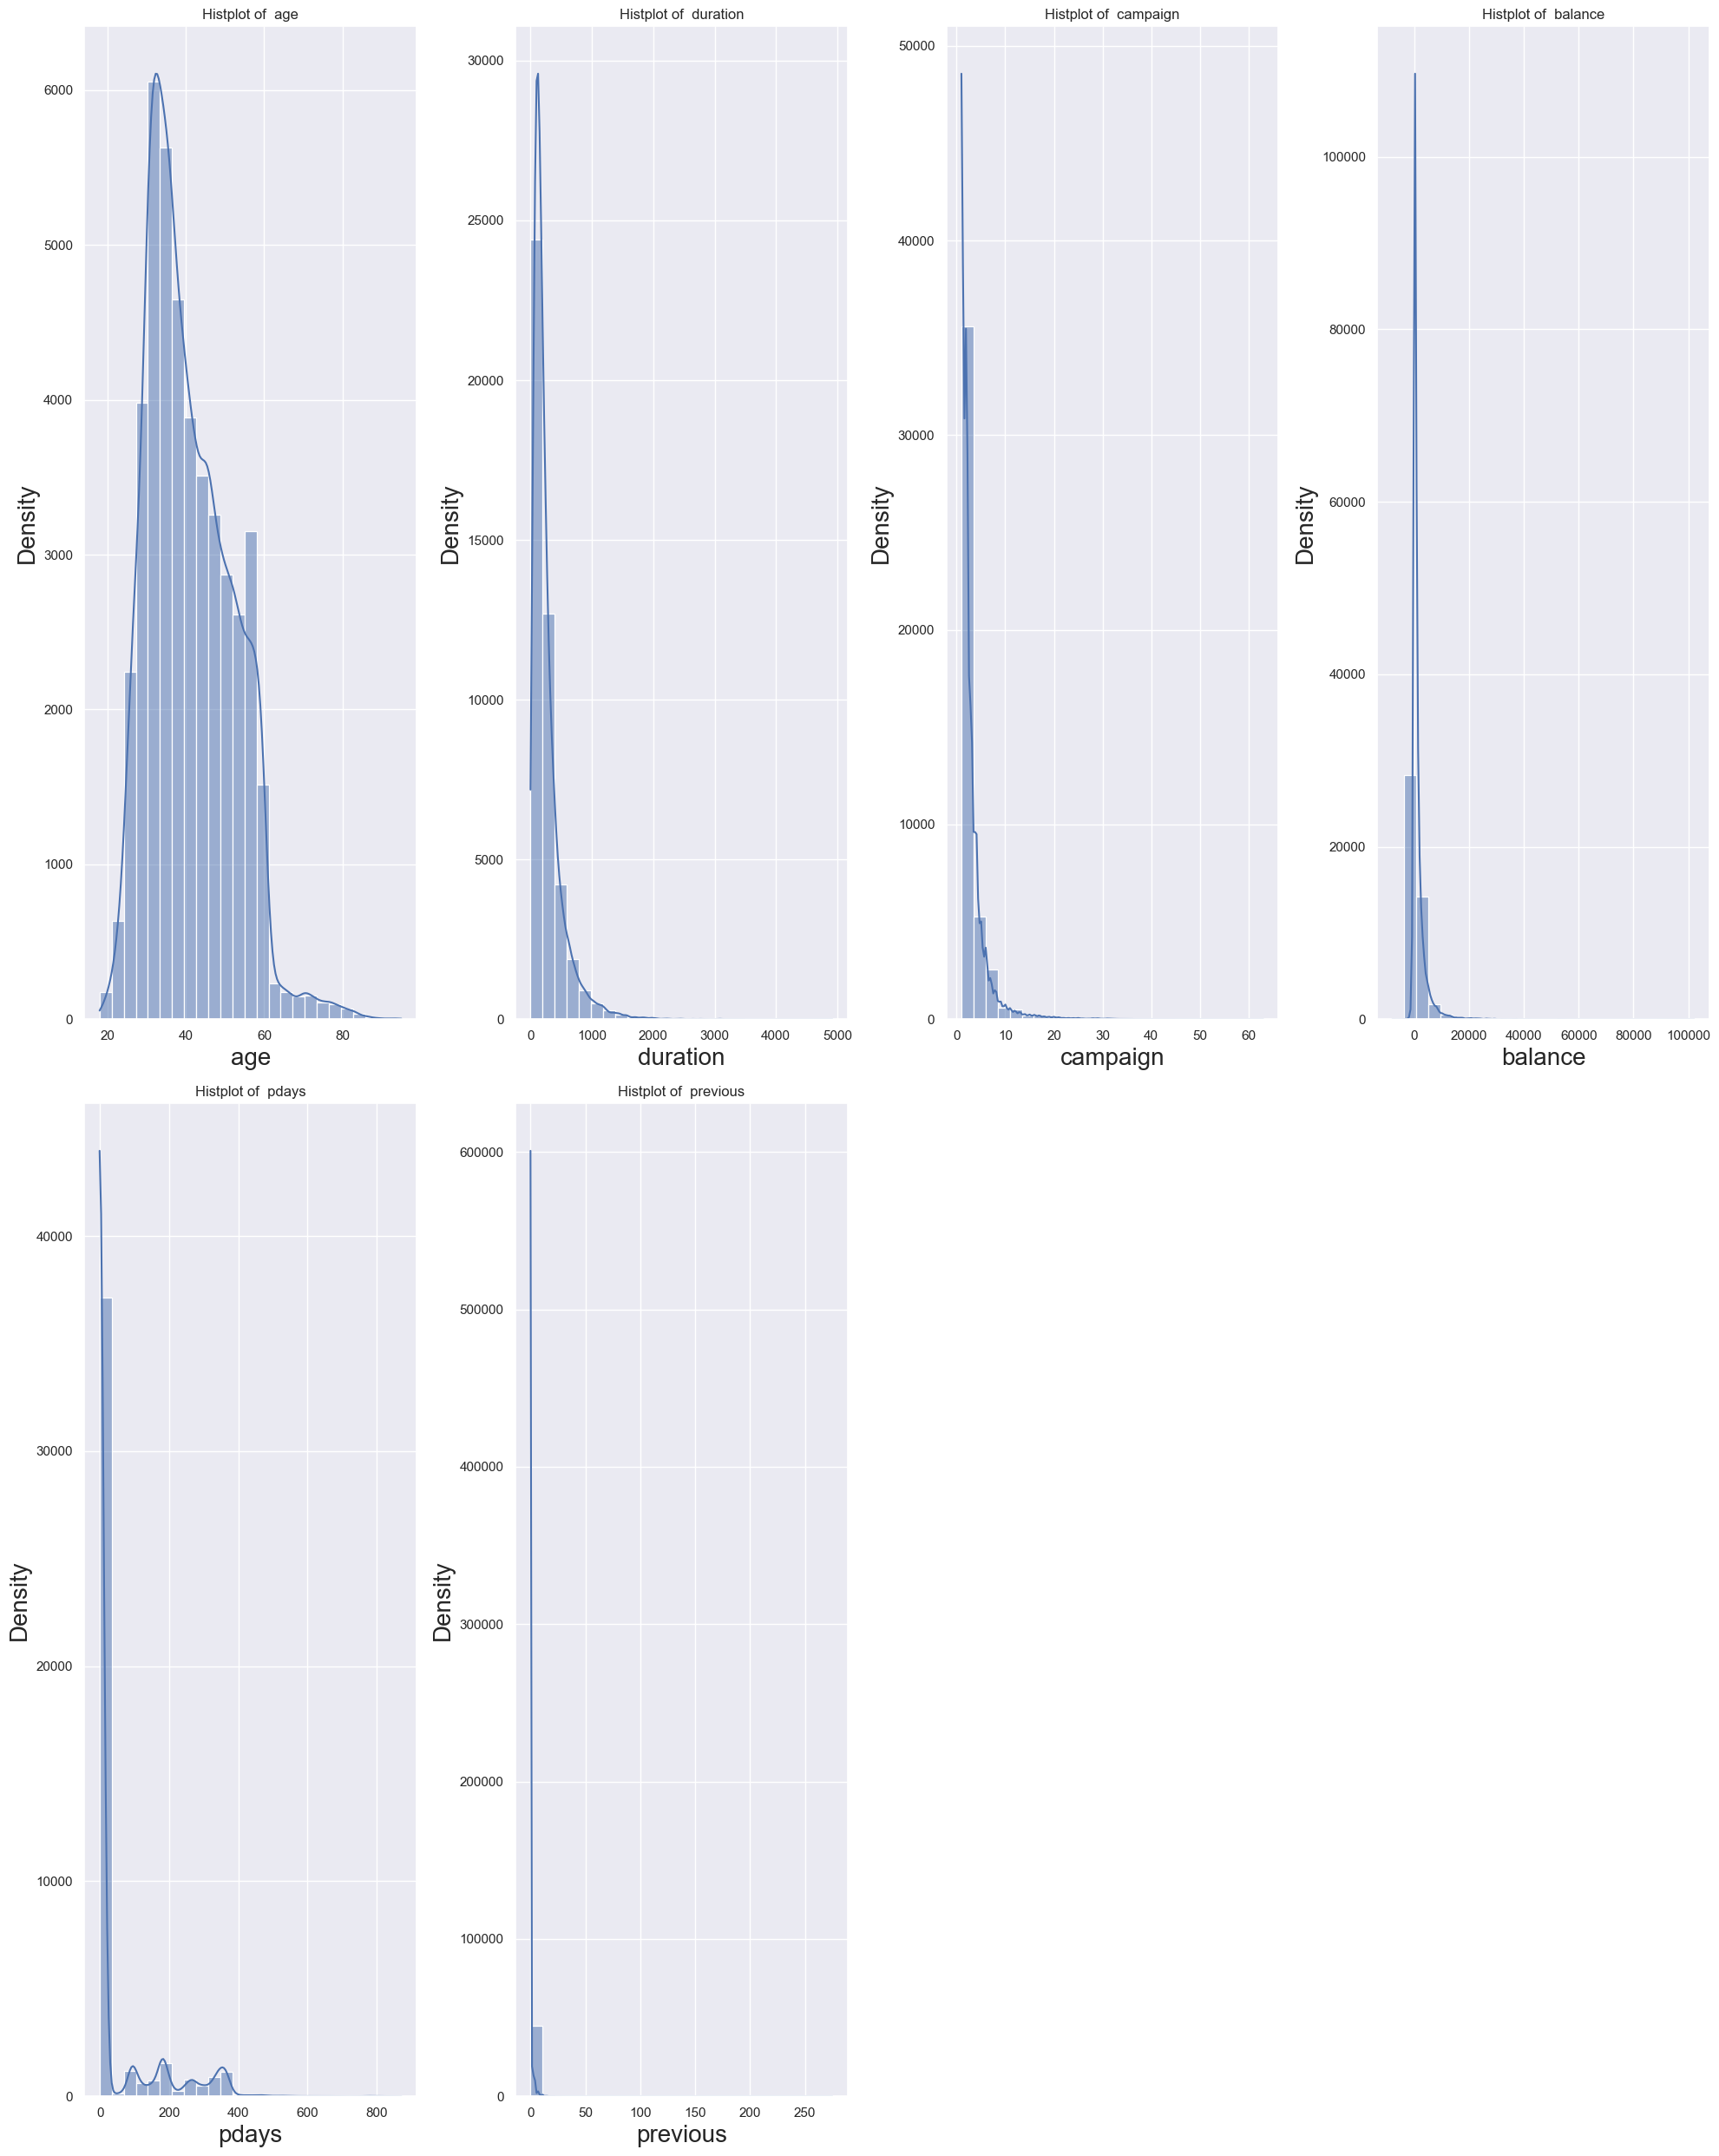

In [22]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in continous_data.columns[:-1]:
    if plotnumber <= 8:
        plt.subplot(2,4, plotnumber)
        sns.histplot(x = df[column], kde = True, data = df, bins = 25)
        plt.title(f"Histplot of  {column}")
        plt.xlabel(column, fontsize = 20)
        plt.ylabel("Density", fontsize = 20)
        plotnumber += 1

plt.tight_layout()
plt.show()

### Insights of univariate Analysis:
1) Marital:
- The majority of individuals in the dataset are married, comprising 61% of the total.
- Single individuals make up a significant portion of the dataset, accounting for 28% of the total.
- Divorced individuals comprise 11% of the dataset.
- The category of "unknown" marital status consists of a negligible portion of the dataset, representing less than 1%.
2) Default:
- The majority of individuals in the dataset have no default status, comprising 79% of the total.
- This indicates that the vast majority of individuals do not have any default history.
- The category of "yes" for default status consists of only 3 instances, representing less than 1% of the total.
- This suggests that defaults are relatively rare within the dataset.
3) Housing:
- The majority of individuals in the dataset have housing, comprising 52% of the total.
- This suggests that a significant portion of the population owns or resides in housing.
- Individuals without housing make up 45% of the dataset.
- While not as prevalent as those with housing, this category still represents a substantial portion of the population. 
4) Loan:
- The majority of individuals in the dataset do not have a loan, comprising 82% of the total.
- This indicates that a significant portion of the population does not currently have any outstanding loans.
- Individuals with a loan make up 15% of the dataset.
- While smaller in number compared to those without a loan, this category still represents a notable portion of the population.
5) Contact:
- The majority of contacts in the dataset are made via cellular communication, comprising 63% of the total.
- This suggests that cellular phones are the preferred or more commonly used method of contact.
- Telephone contacts make up 37% of the dataset.
- While smaller in number compared to cellular contacts, this category still represents a significant portion of the contacts.
6) Day of week :
- Contacts are predominantly made on weekdays, with Monday, Tuesday, Wednesday, and Friday collectively representing 80% of the total contacts provided.
7) Pdays:
- The fact that all instances have a value of 999 for the "pdays" column suggests that no previous contact has been made with these clients before the current campaign or dataset collection.
8) Poutcome:
- The majority of instances (86%) fall into the "nonexistent" category, indicating that there was no previous campaign outcome for these clients.
- A smaller proportion of instances (10%) fall into the "failure" category, suggesting that previous campaign attempts with these clients were unsuccessful.
9) Y:
- The majority of instances (89%) are classified as "no", indicating that the target event did not occur.
- A smaller proportion of instances (11%) are classified as "yes", indicating that the target event did occur.

#### Bivariate Analysis of Continous_data:

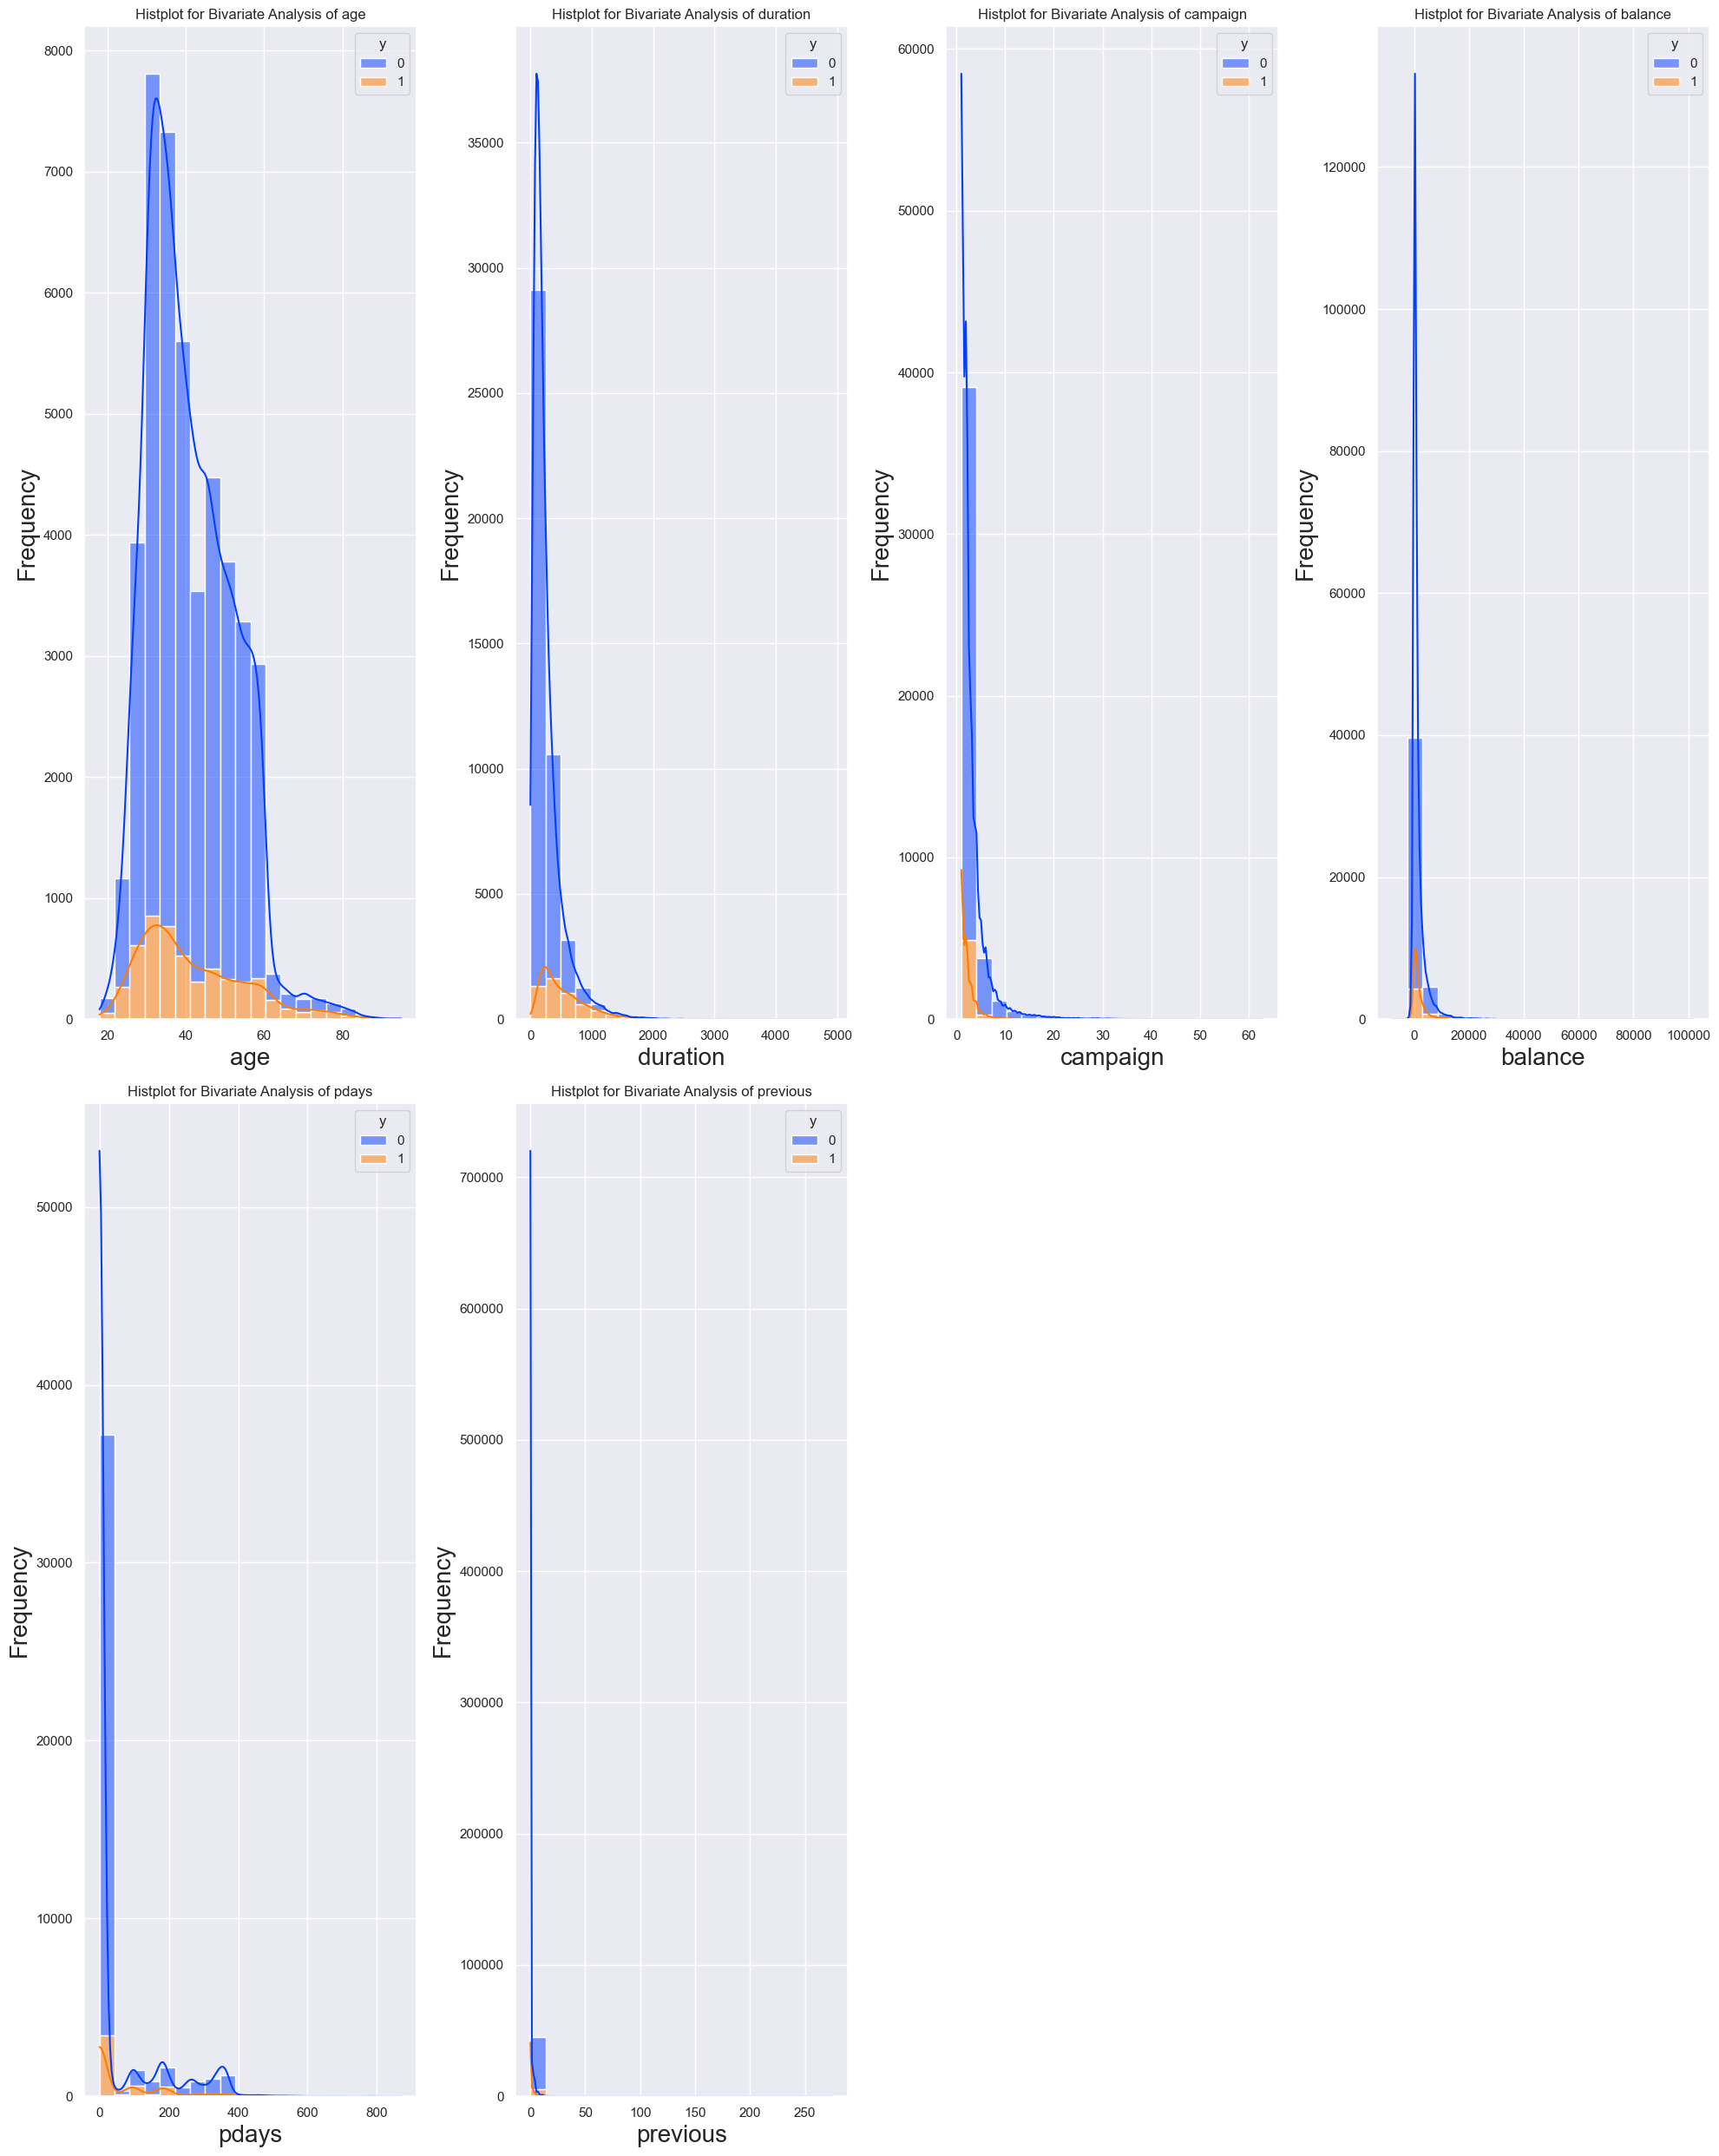

In [23]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in continous_data.columns[:-1]:
    if plotnumber <= 8:
        plt.subplot(2,4,plotnumber)
        sns.histplot(x = df[column], hue = df.y, kde = True,bins = 20 ,multiple='stack',palette='bright')
        plt.title(f"Histplot for Bivariate Analysis of {column}")
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Frequency', fontsize =20)
        plotnumber += 1

plt.tight_layout()

#### Univariate Analysis of categorical_data features:

In [24]:
categorical_column = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome']]

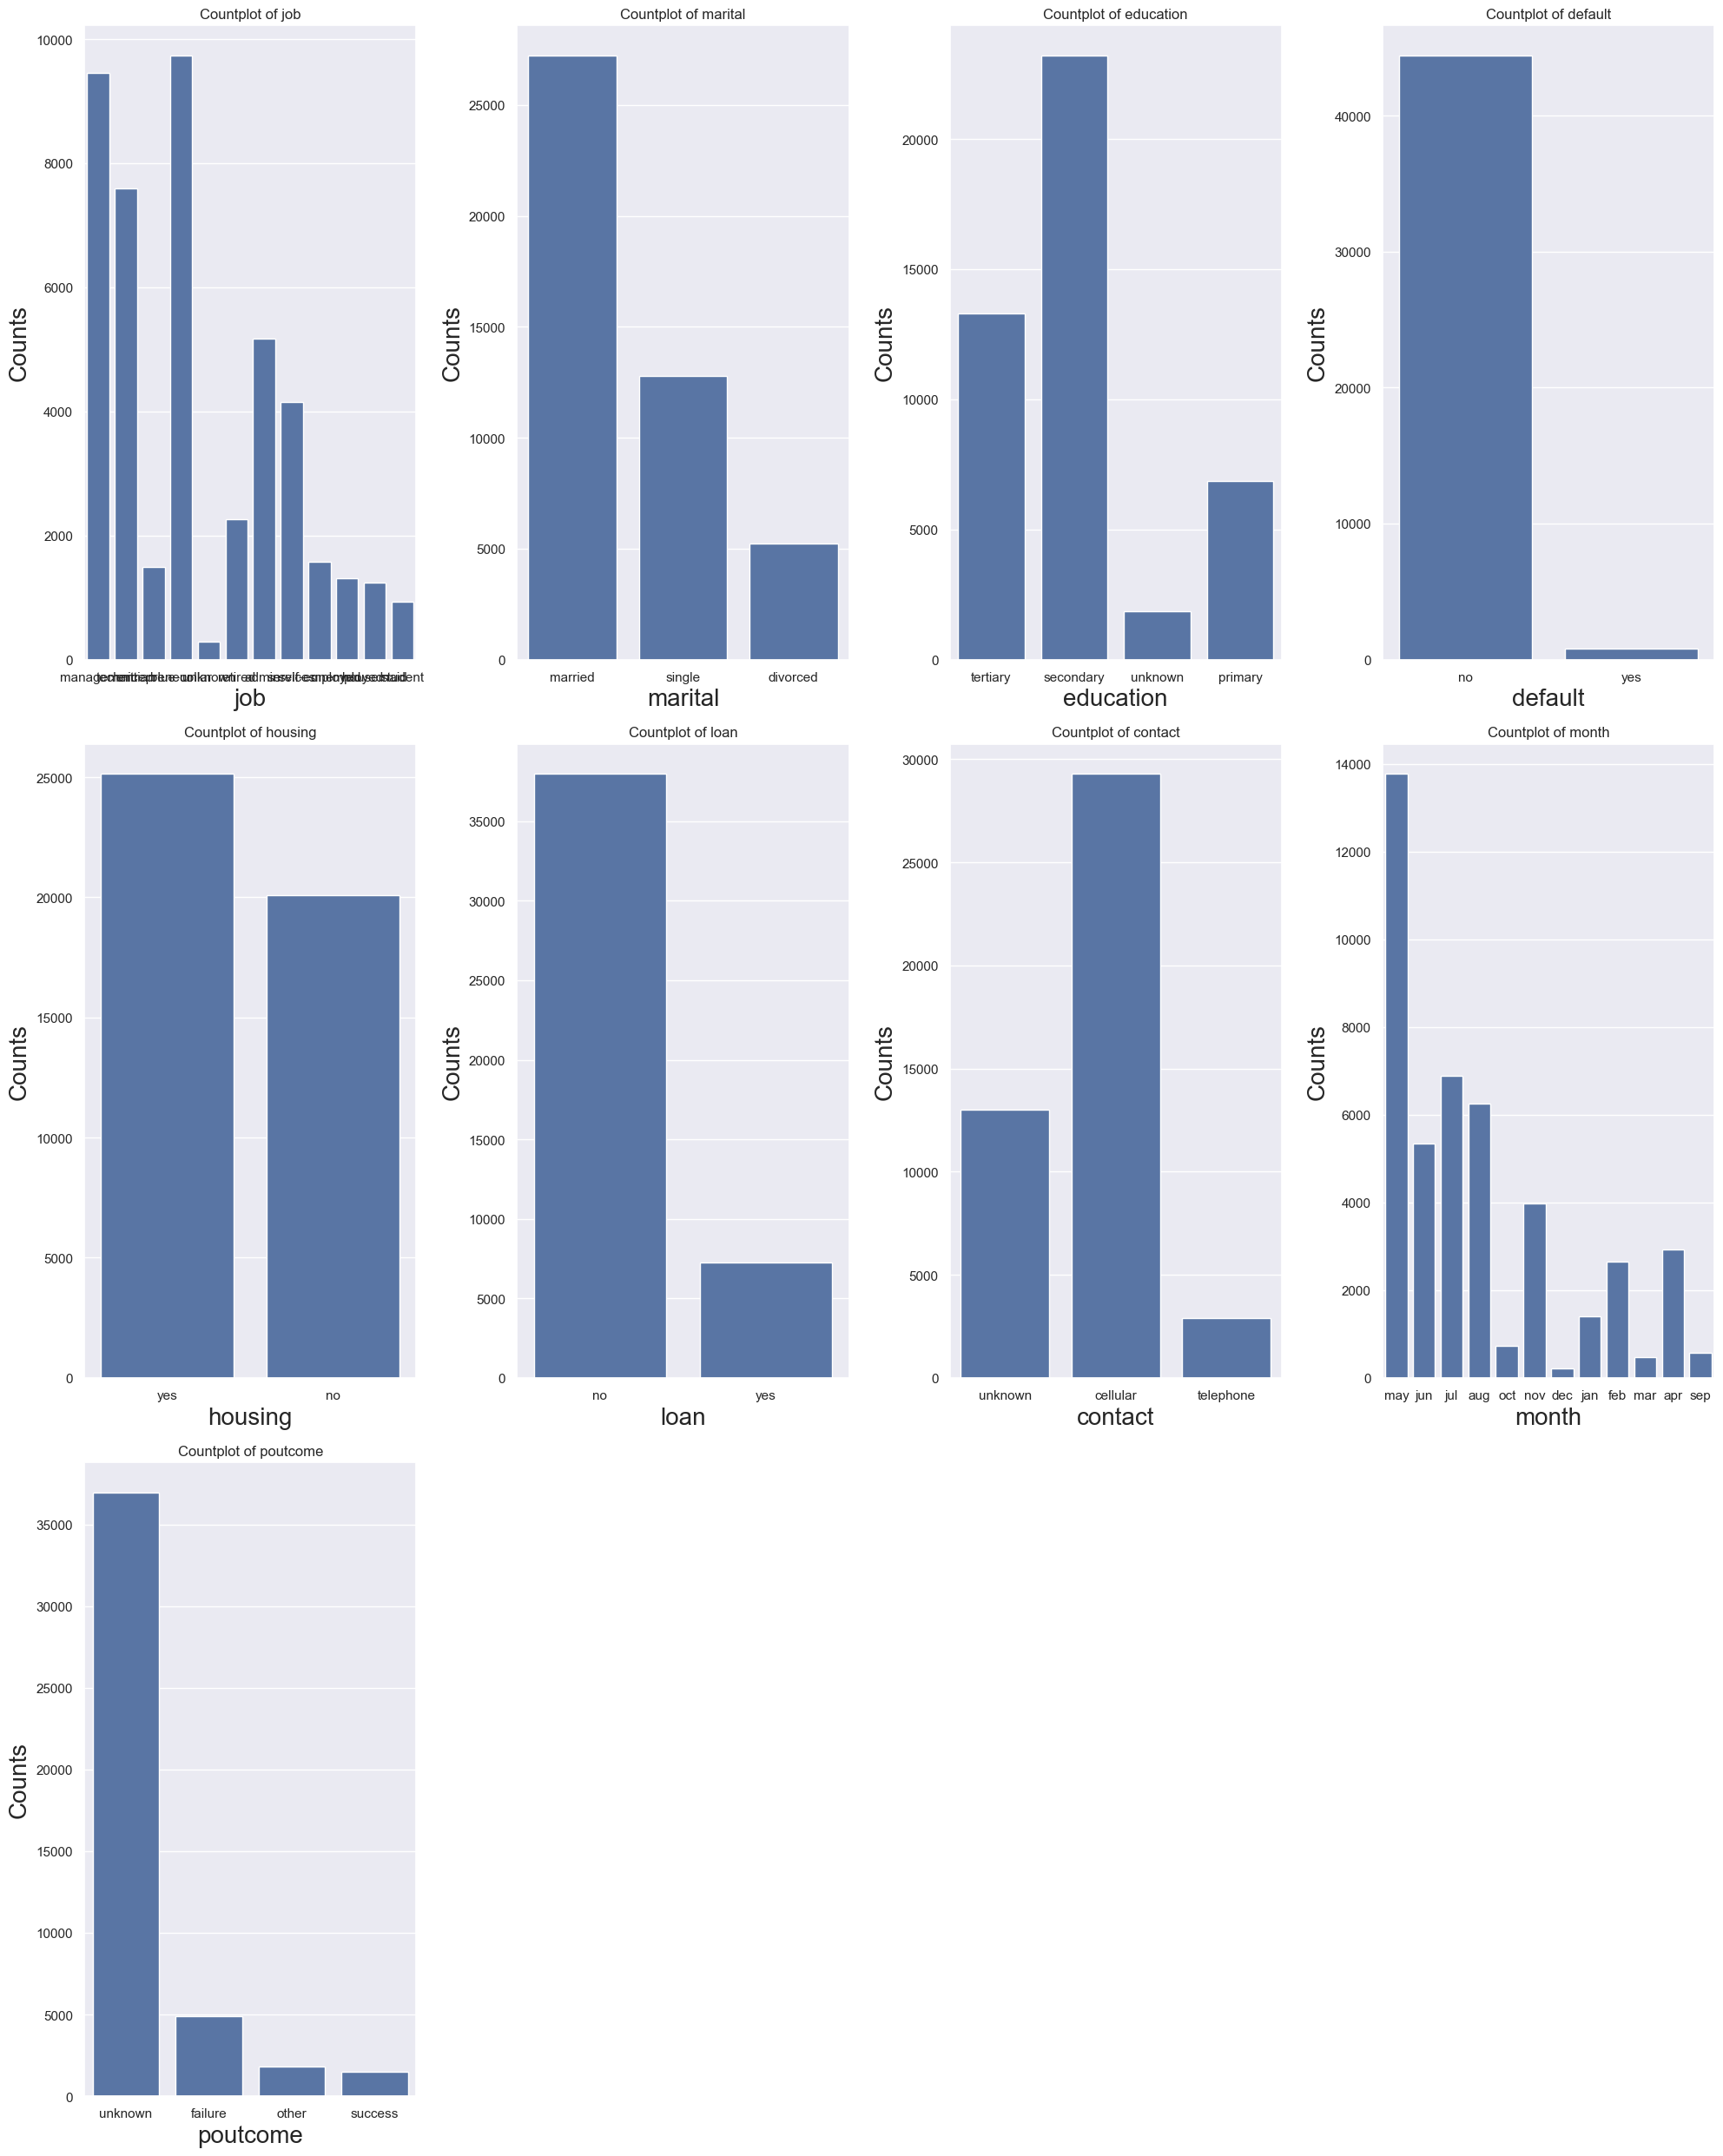

In [25]:
plt.figure(figsize = (20, 25), facecolor= 'white')
plotnumber =1
for column in categorical_column.columns:
    if plotnumber <= 12:
        plt.subplot(3,4, plotnumber)
        sns.countplot(x = df[column])
        plt.title(f"Countplot of {column}")
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Counts', fontsize = 20)
        plotnumber += 1

plt.tight_layout()

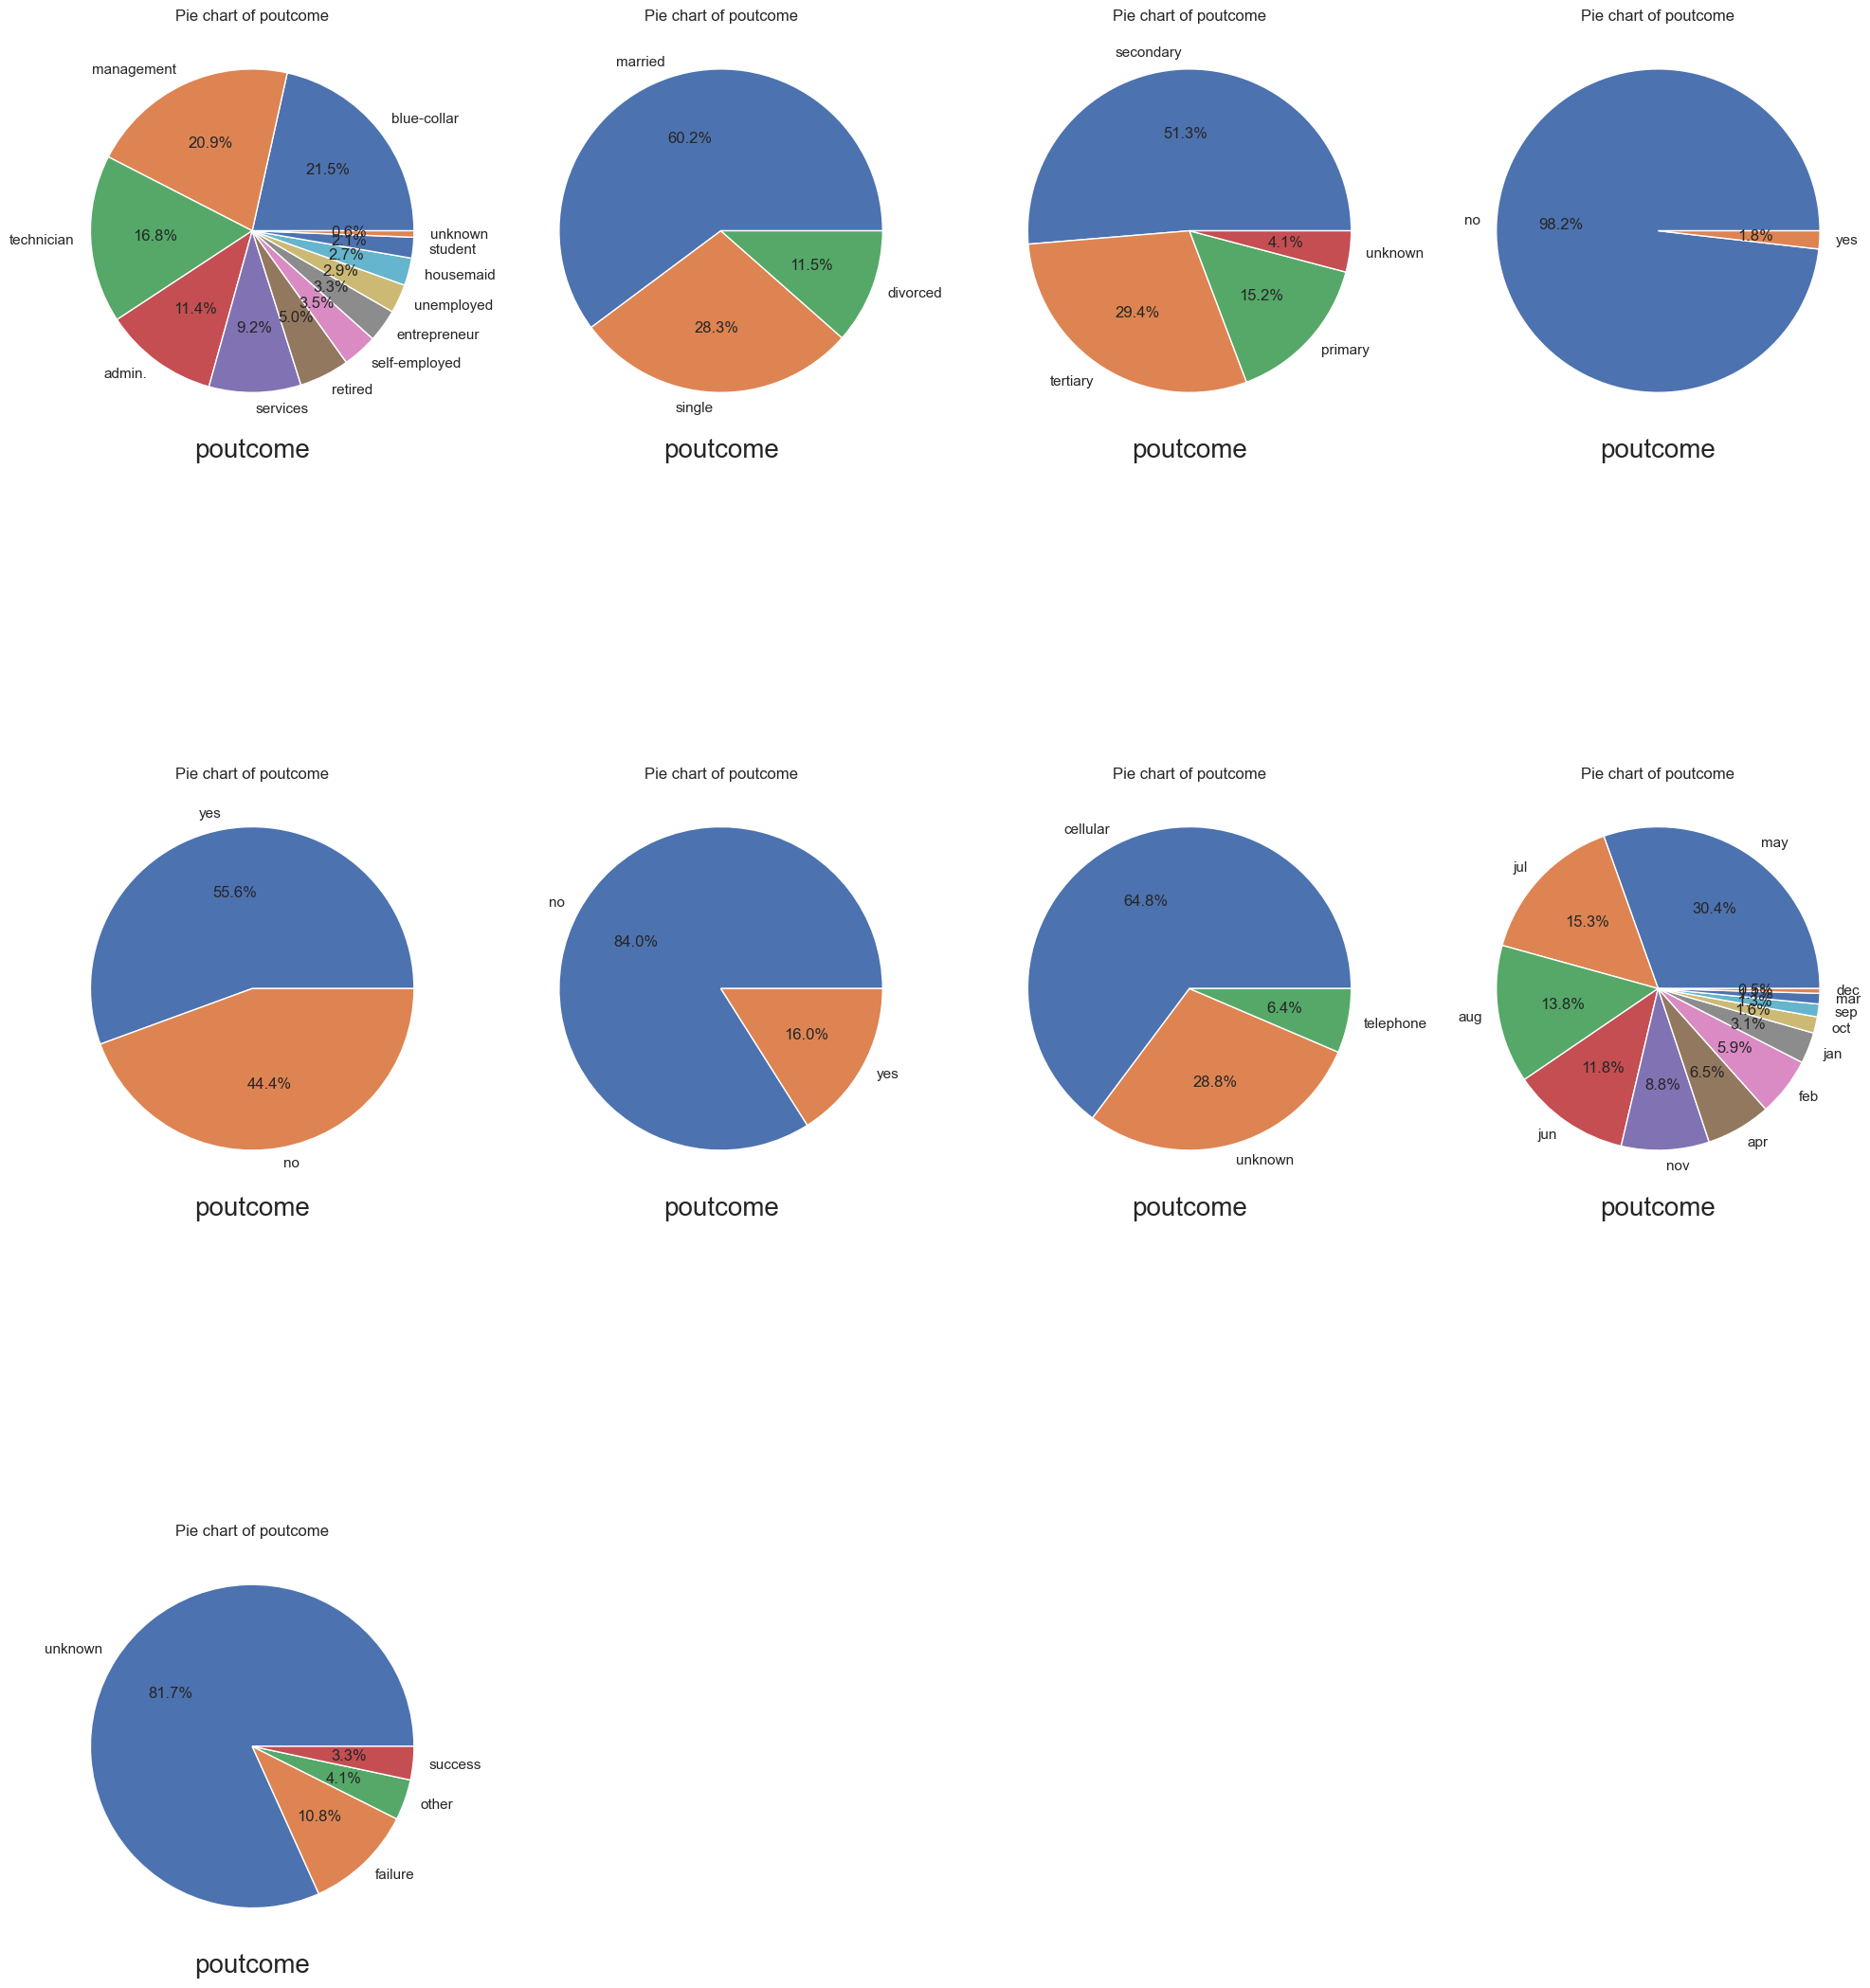

In [26]:
plt.figure(figsize = (20, 25), facecolor= 'white')
plotnumber= 1
for feature in categorical_column.columns:
    if plotnumber <= 12:
        plt.subplot(3,4,plotnumber)
        counts = df[feature].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
        plt.title(f"Pie chart of {column}")
        plt.xlabel(column, fontsize = 20)
        plotnumber += 1

plt.tight_layout()

#### Univariate analysis of categorical features reveals valuable insights :


### Job:
- The most common job categories among customers are blue-collar, management, and technician.
- There's a significant proportion of customers with unknown job categories.
- This variable indicates a diverse range of occupations among the customers, with some categories being more prevalent than others.

### Marital:
- The majority of customers are married, followed by single and divorced individuals.
- Marital status can influence financial decisions and investment behavior.

### Education:
- A considerable number of customers have secondary education, followed by tertiary and primary education.
- There's also a portion of customers with unknown education levels.
- Education level may affect financial literacy and investment preferences.

### Default:
- Most customers do not have credit in default.
- A small proportion of customers have defaulted credit.
- This variable indicates the credit risk profile of the customer base.

### Housing:
- Approximately half of the customers have a housing loan.
- The other half do not have a housing loan.
- Housing status can influence disposable income and financial stability.

### Loan:
- The majority of customers do not have a personal loan.
- A significant minority have a personal loan.
- Loan status reflects the financial obligations of the customers.

### Contact:
- The most common contact communication type is cellular.
- A substantial number of customers have unknown contact communication type.
- This variable indicates the preferred mode of communication for marketing campaigns.

### Month:
- The most common months for last contact are May, July, and August.
- Some months have significantly fewer contacts, such as December and March.
- Month of contact can influence customer receptivity to marketing campaigns.

### Poutcome:
- The majority of customers have an unknown outcome from the previous marketing campaign.
- A significant portion experienced a failure in the previous campaign, while fewer had successful outcomes.
- Past campaign outcdriven decision-making in marketing campaigns.

*****Job********
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


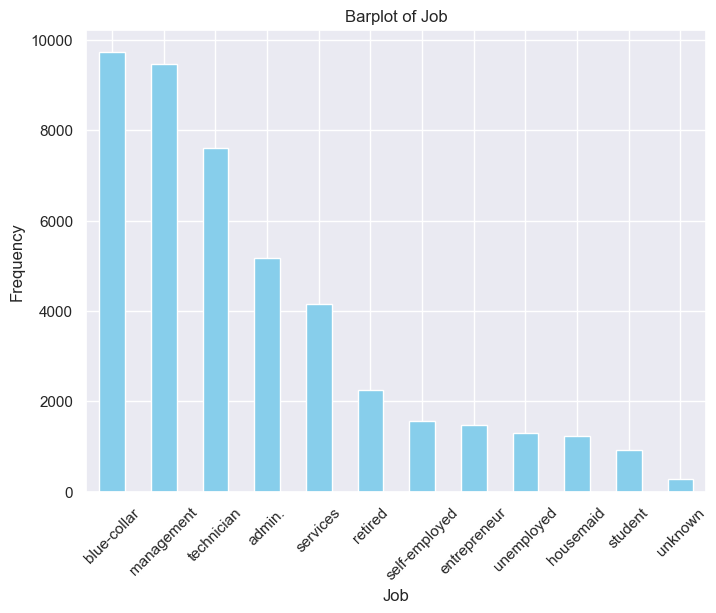

*****Marital********
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


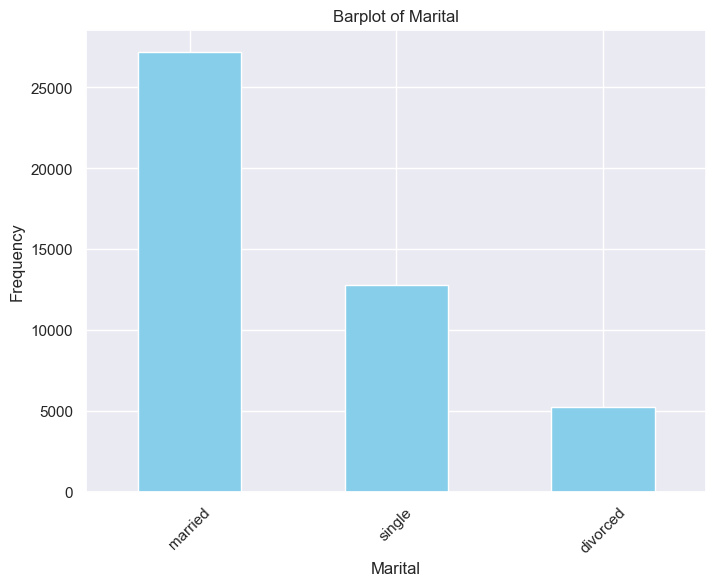

*****Education********
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


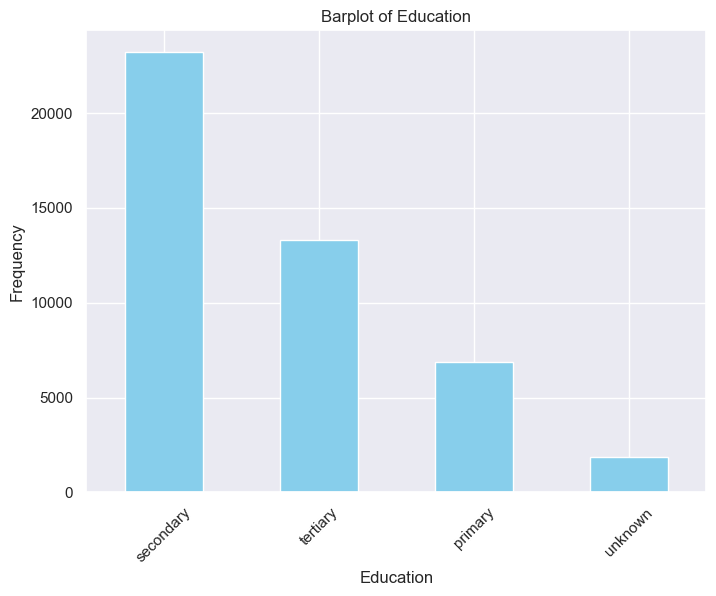

*****Default********
no     44396
yes      815
Name: default, dtype: int64


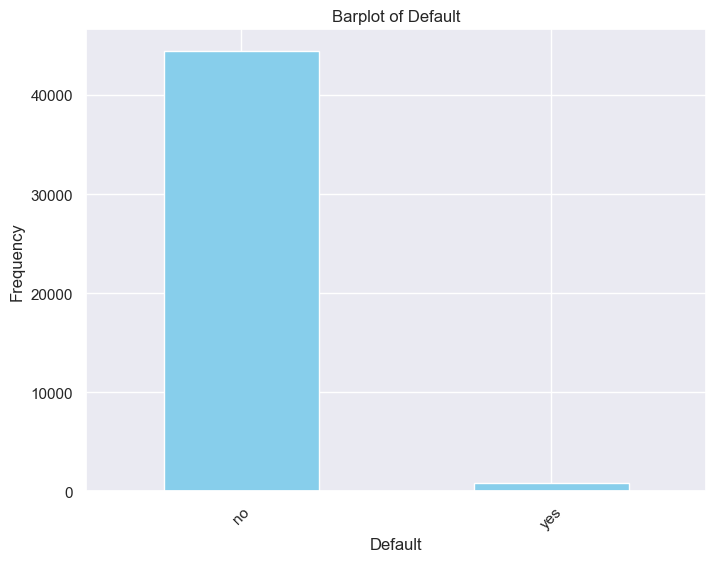

*****Housing********
yes    25130
no     20081
Name: housing, dtype: int64


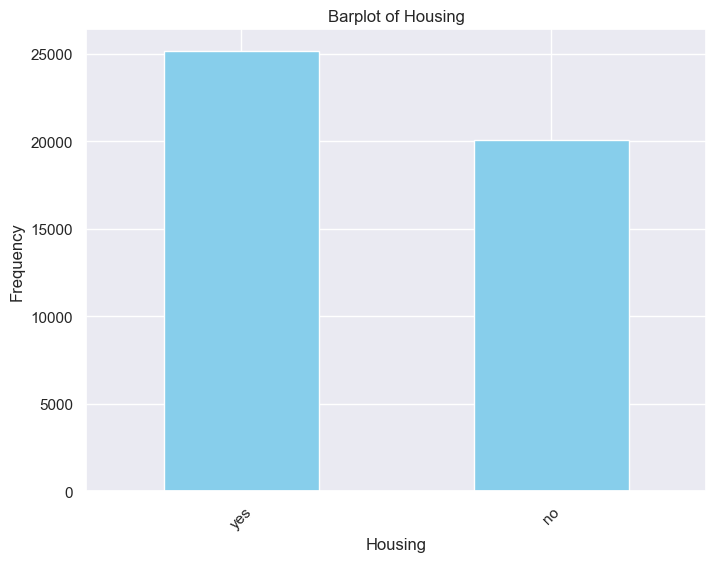

*****Loan********
no     37967
yes     7244
Name: loan, dtype: int64


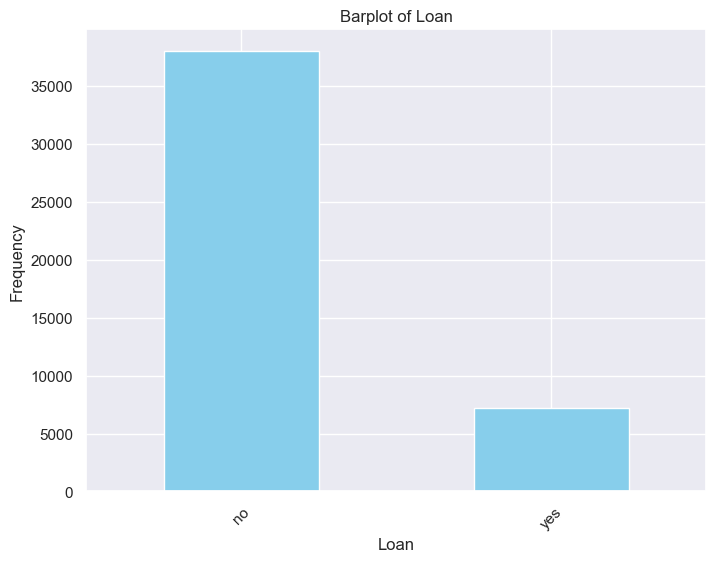

*****Contact********
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


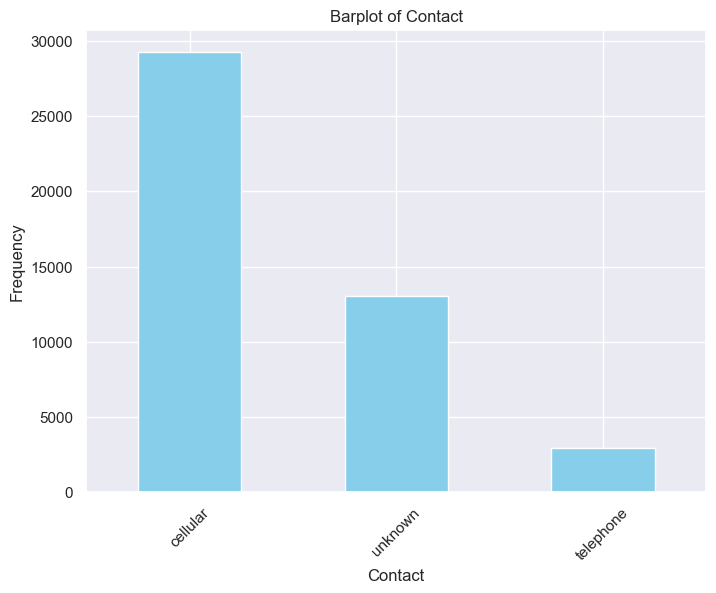

*****Month********
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


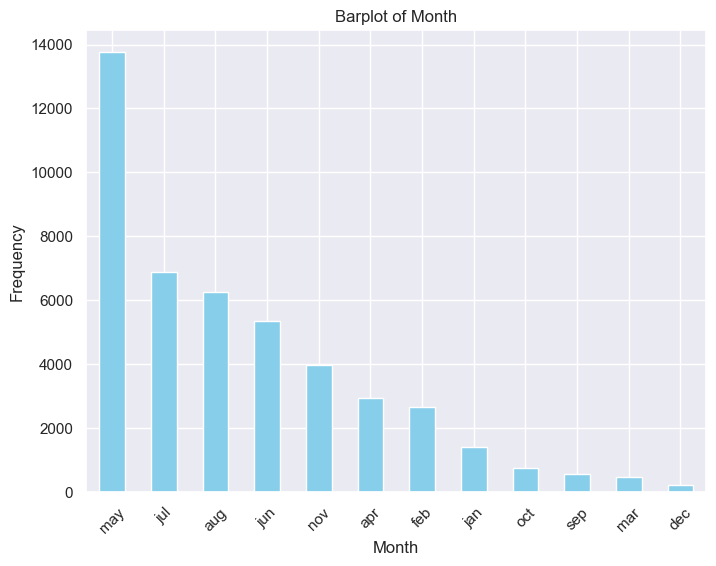

*****Poutcome********
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


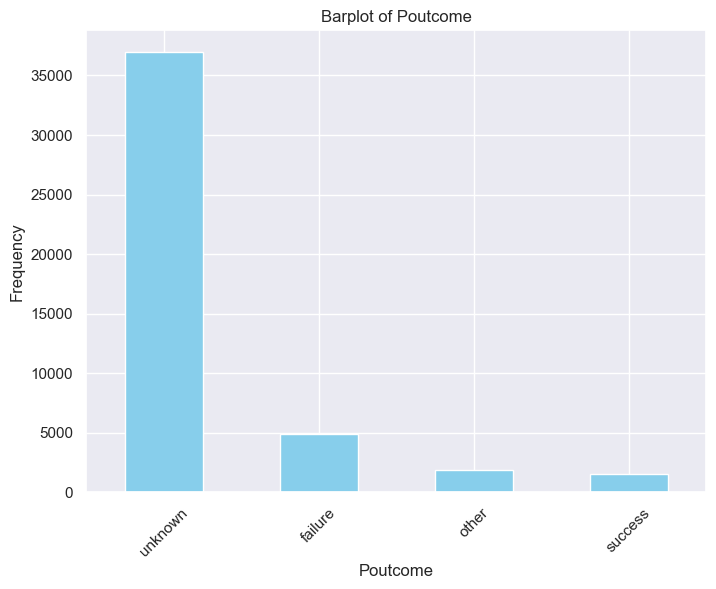

In [27]:
for feature in categorical_column:
    print(f"*****{feature.capitalize()}********")

    value_counts = df[feature].value_counts()
    print(value_counts)

    value_counts.plot(kind = 'bar', figsize =(8, 6), color = 'skyblue')
    plt.title(f"Barplot of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.xticks(rotation = 45)
    plt.show()


#### Bivariate Analysis of categorical_columns:

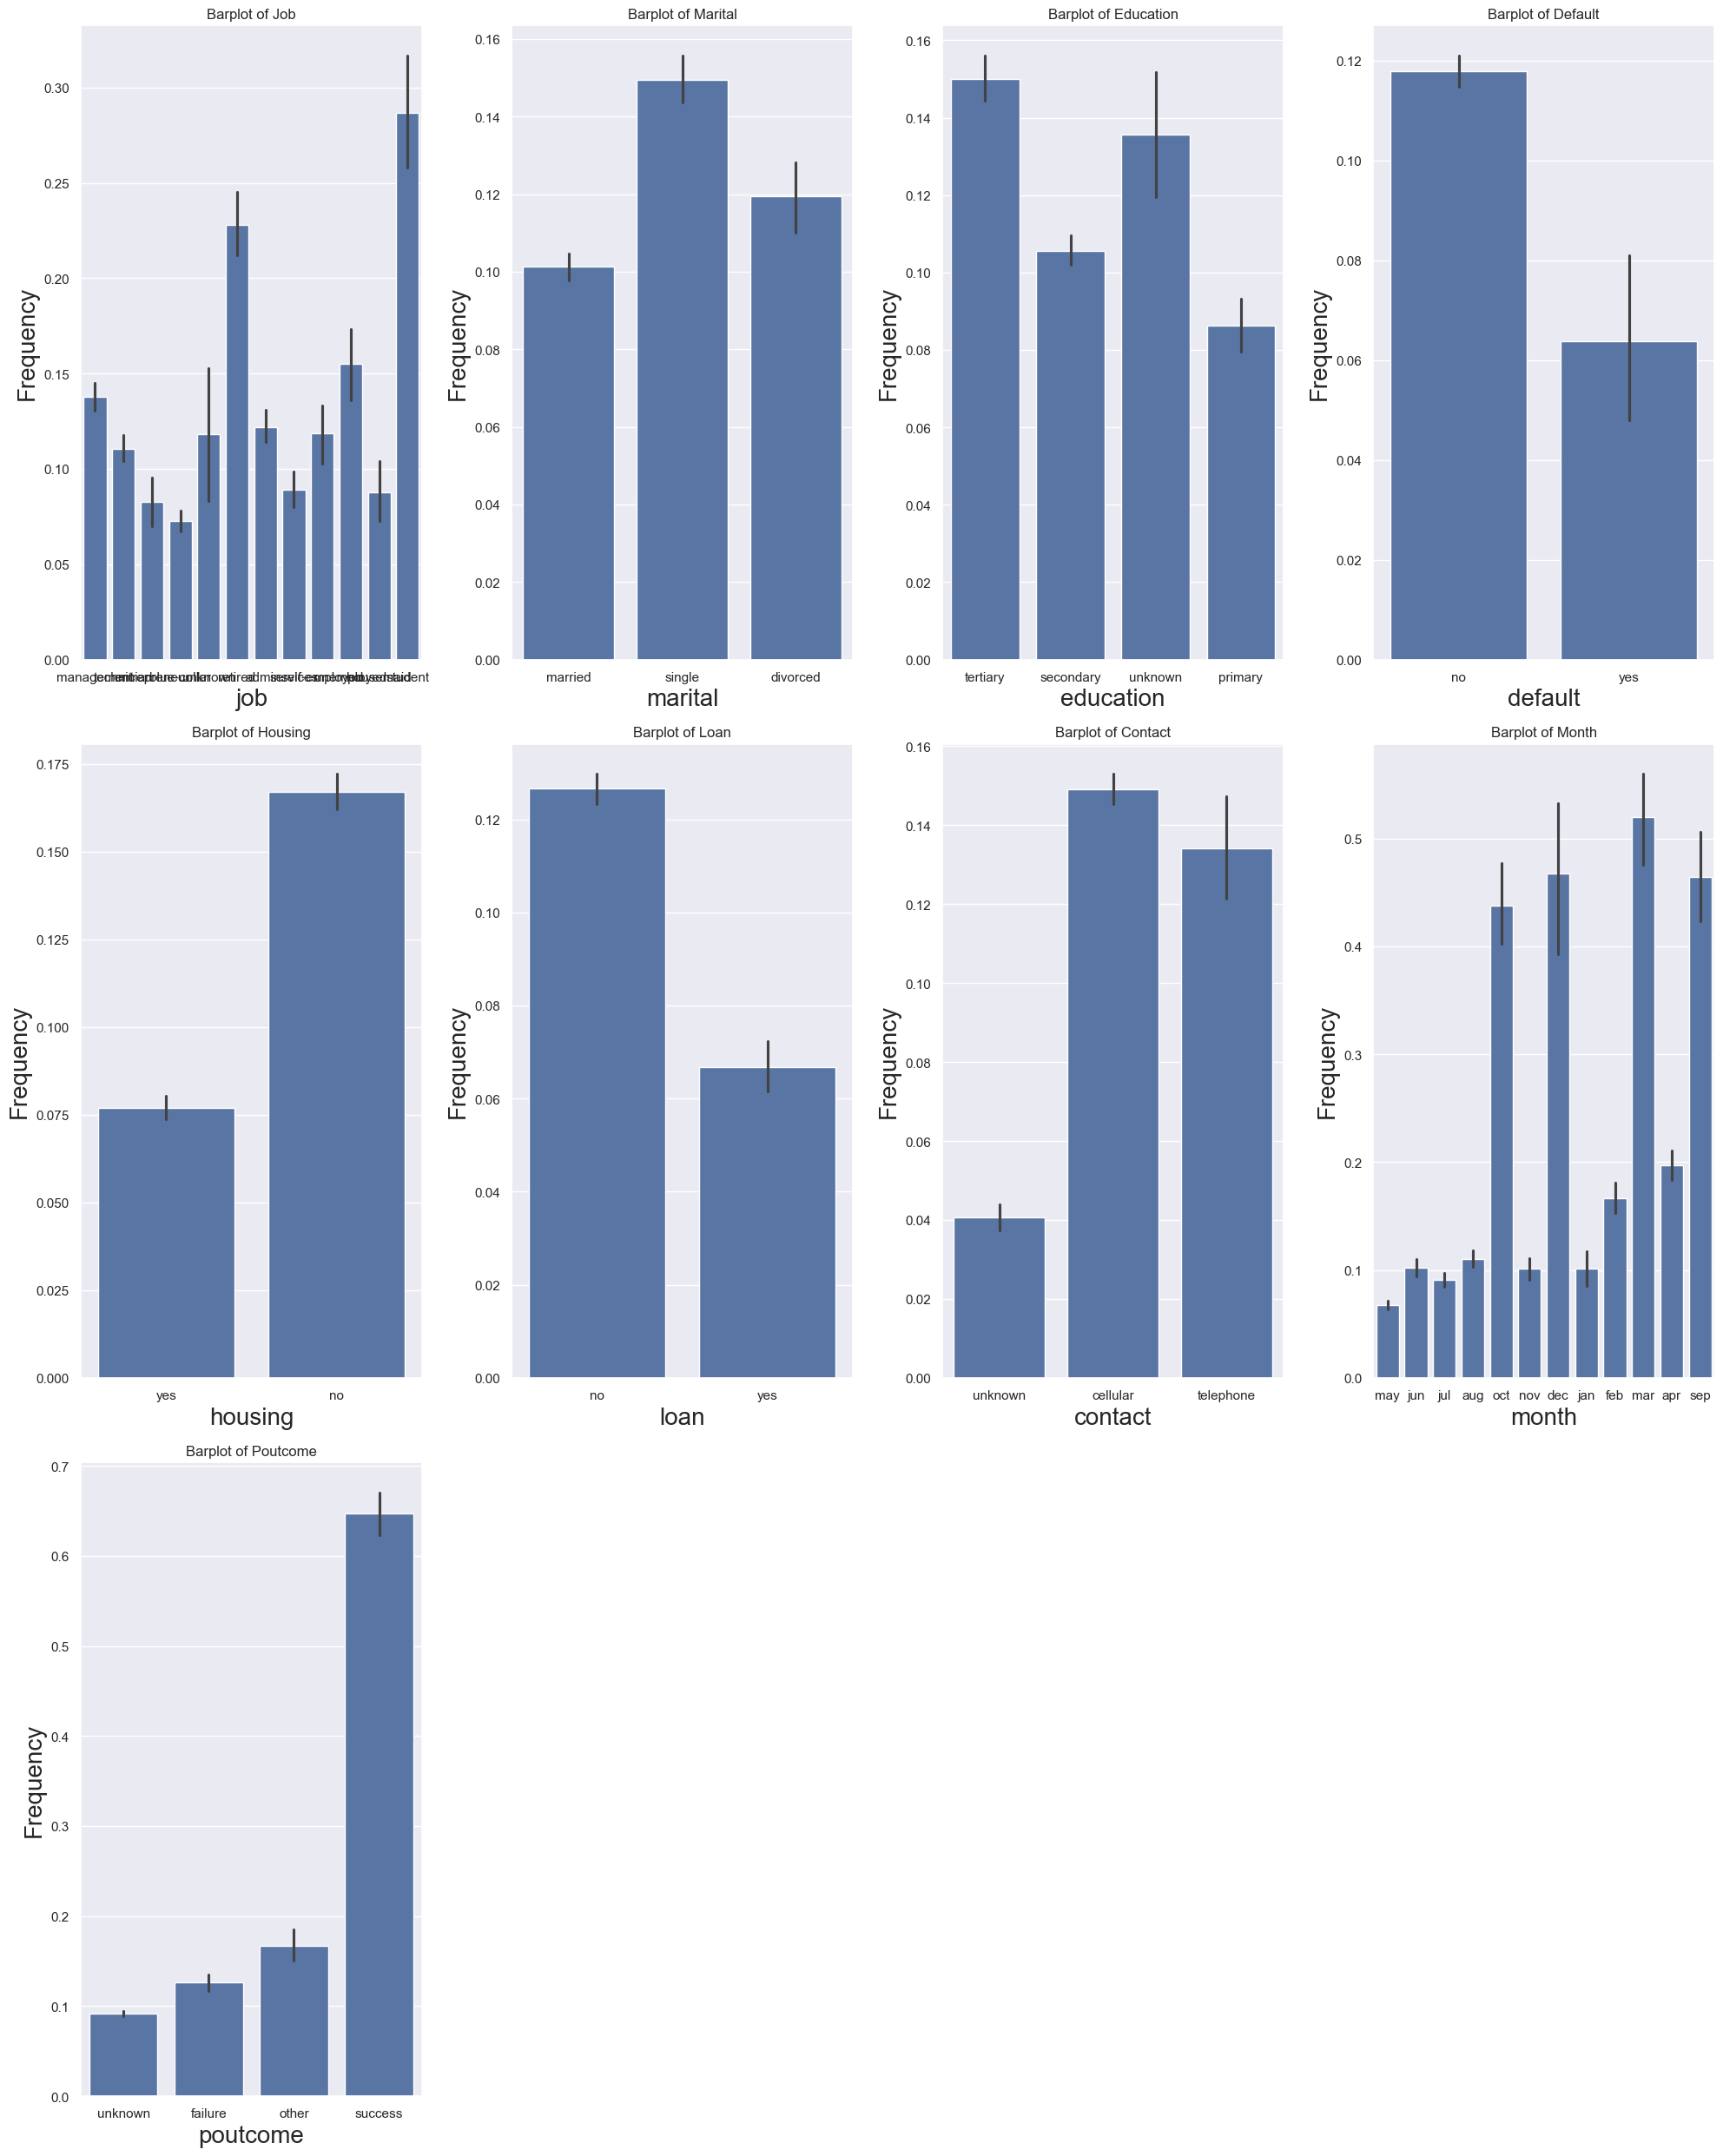

In [28]:
plt.figure(figsize= (20, 25), facecolor = 'white')
plotnumber = 1
for var in categorical_column.columns:
    if plotnumber <= 12:
        plt.subplot(3,4,plotnumber)
        sns.barplot(x = df[var], y = df.y )
        plt.title(f"Barplot of {var.capitalize()}")
        plt.xlabel(var, fontsize = 20)
        plt.ylabel('Frequency', fontsize =20)
        plotnumber += 1

plt.tight_layout()

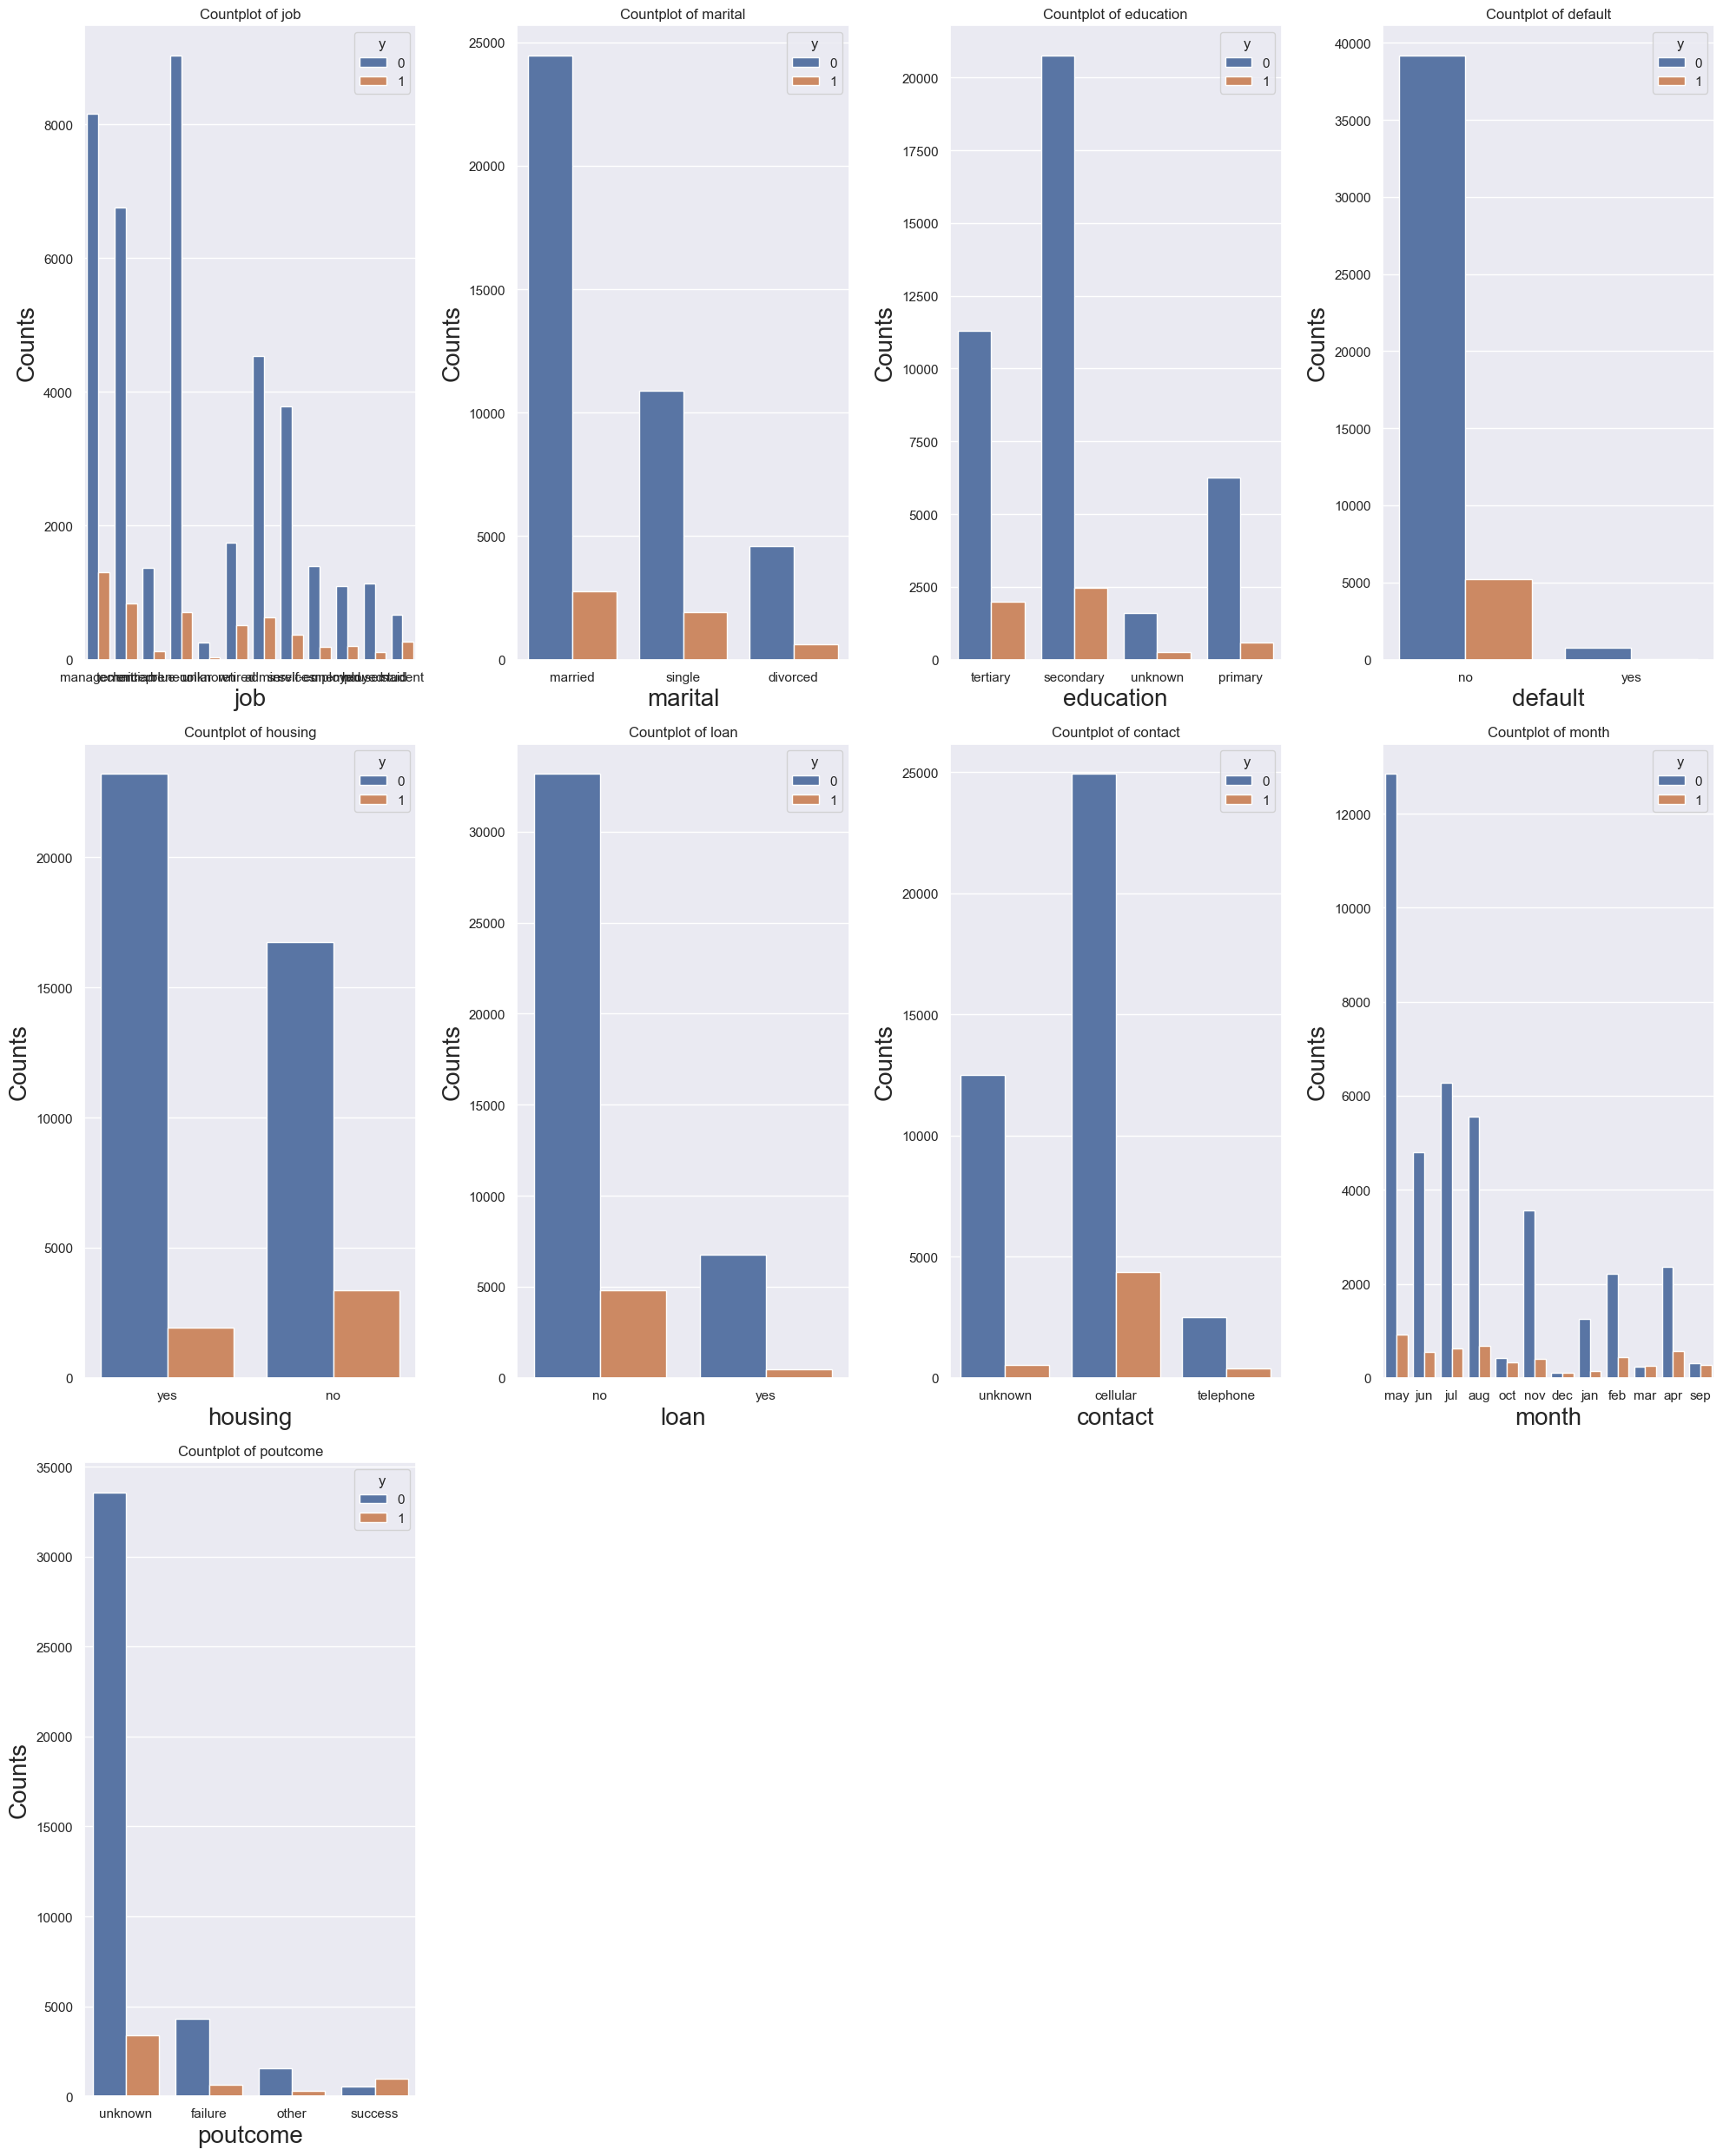

In [29]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1
for column in categorical_column.columns:
    if plotnumber <= 12:
        plt.subplot(3, 4, plotnumber)
        sns.countplot(x=df[column].astype('str'), hue=df['y'].astype('str'), data=df)
        plt.title(f"Countplot of {column}")
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Counts', fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()

### Bivariate Analysis of categorical features :


##### Job:
- Management and technicians have a relatively higher proportion of customers who subscribed to the term deposit compared to other job categories.
- Blue-collar workers, services, and admin roles have a larger number of customers who did not subscribe to the term deposit.###

### Marital:
- Married individuals constitute a significant portion of both subscribers and non-subscribers to the term deposit.
- Single individuals have a relatively higher proportion of subscribers compared to divorced individua###ls.

### Education:
- Customers with tertiary education have a higher proportion of subscribers compared to other education levels.
- Primary education and secondary education levels have a higher number of customers who did not subscribe to the term d###eposit.

### Default:
- Customers with no default have a larger proportion of subscribers to the term deposit compared to those with a default.
- The majority of customers, regardless of default status, did not subscribe to the te###rm deposit.

### Housing:
- Customers with housing loans have a larger proportion of non-subscribers to the term deposit compared to those without ###housing loans.

### Loan:
- Customers without personal loans have a higher proportion of subscribers to the term deposit compared to those wit###h personal loans.

### Contact:
- Customers contacted via cellular communication have a larger proportion of subscribers to the term deposit compared to those contacted via telephone or with unkn###own contact methods.

### Month:
- Certain months such as December, March, and April have a higher proportion of subscribers to the term deposit compared to other months.
- May has a large number of non-subscribers c###ompared to other months.

### Poutcome:
- Customers with a successful outcome from the previous marketing campaign have a significantly higher proportion of subscribers to the term deposit compared to those with otheustomer segments more effectively.

*******Job********
y                 0     1
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


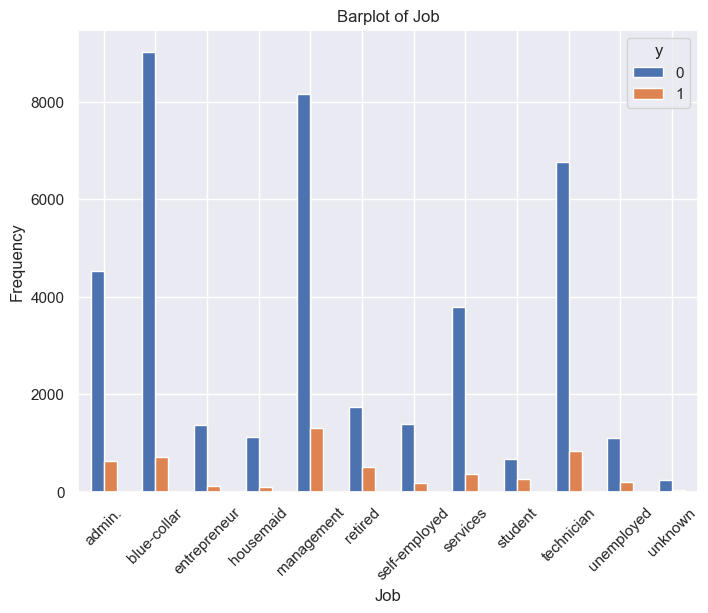

*******Marital********
y             0     1
marital              
divorced   4585   622
married   24459  2755
single    10878  1912


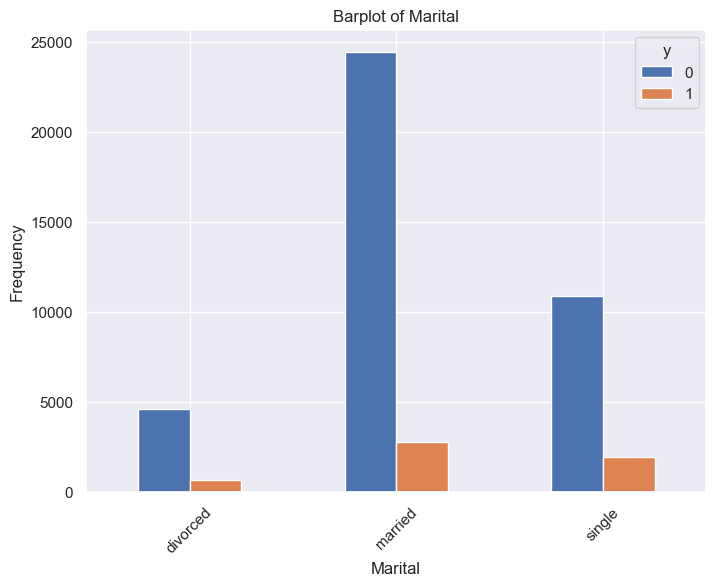

*******Education********
y              0     1
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252


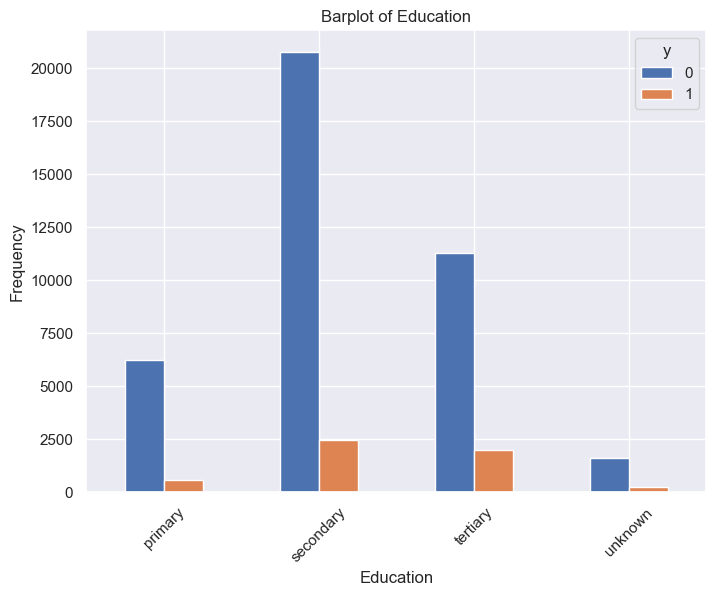

*******Default********
y            0     1
default             
no       39159  5237
yes        763    52


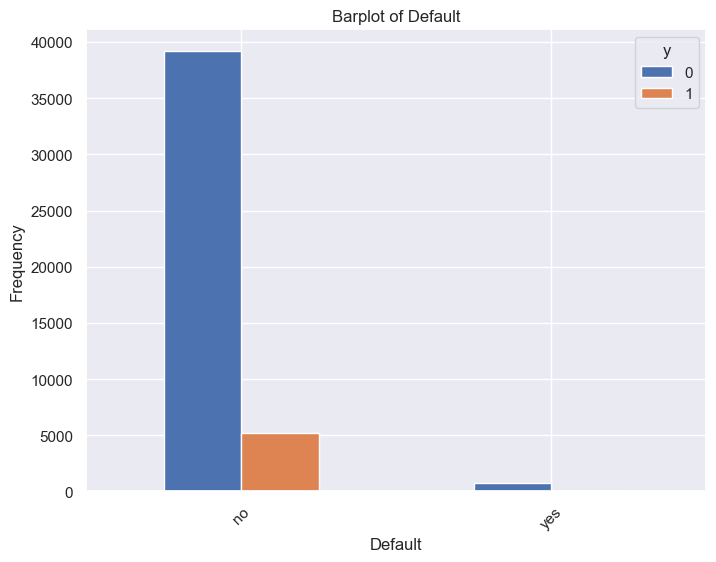

*******Housing********
y            0     1
housing             
no       16727  3354
yes      23195  1935


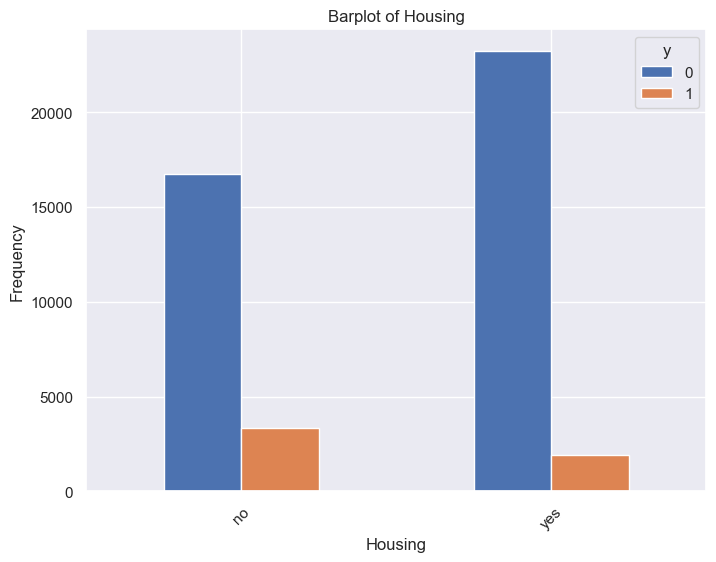

*******Loan********
y         0     1
loan             
no    33162  4805
yes    6760   484


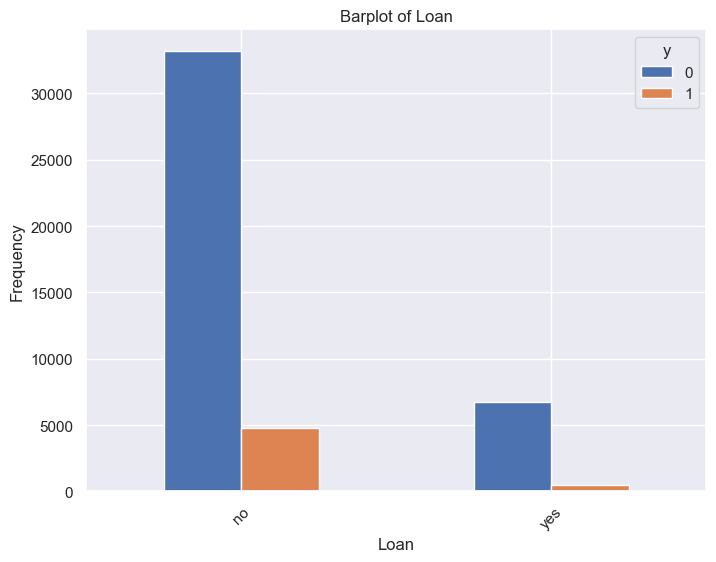

*******Contact********
y              0     1
contact               
cellular   24916  4369
telephone   2516   390
unknown    12490   530


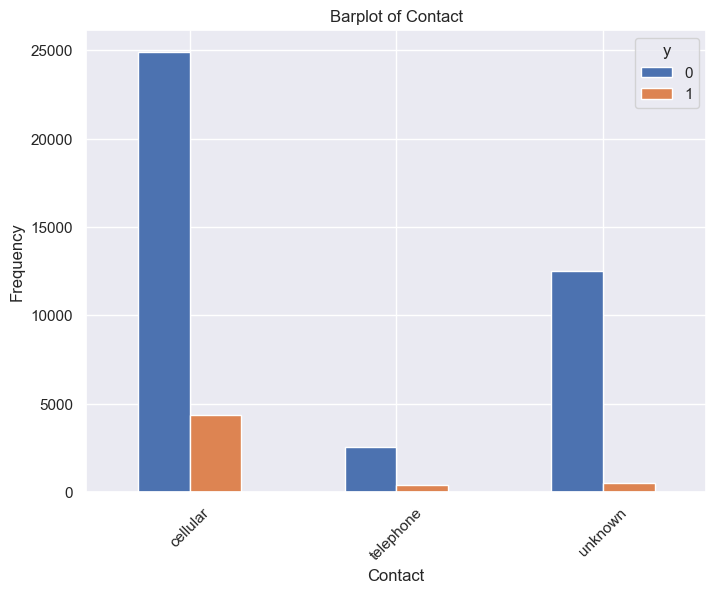

*******Month********
y          0    1
month            
apr     2355  577
aug     5559  688
dec      114  100
feb     2208  441
jan     1261  142
jul     6268  627
jun     4795  546
mar      229  248
may    12841  925
nov     3567  403
oct      415  323
sep      310  269


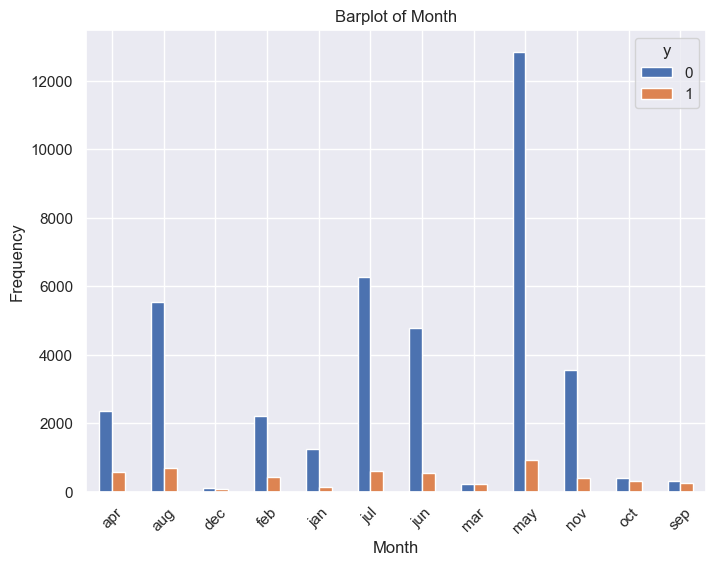

*******Poutcome********
y             0     1
poutcome             
failure    4283   618
other      1533   307
success     533   978
unknown   33573  3386


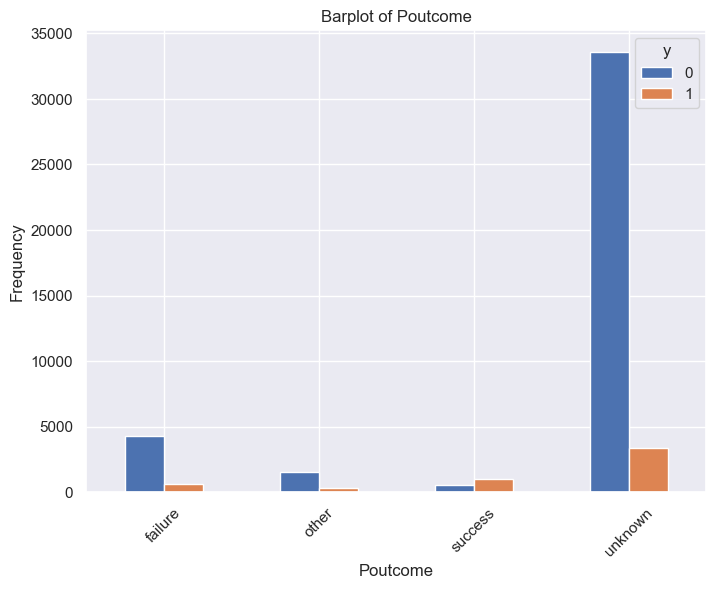

In [30]:
for feat in categorical_column.columns:
    print(f"*******{feat.capitalize()}********")

    group_counts = df.groupby([feat, 'y']).size().unstack()
    print(group_counts)
    group_counts.plot(kind= 'bar', figsize = (8,6))
    plt.title(f"Barplot of {feat.capitalize()}")
    plt.xlabel(feat.capitalize())
    plt.ylabel('Frequency')
    plt.xticks(rotation = 45)
    plt.show()

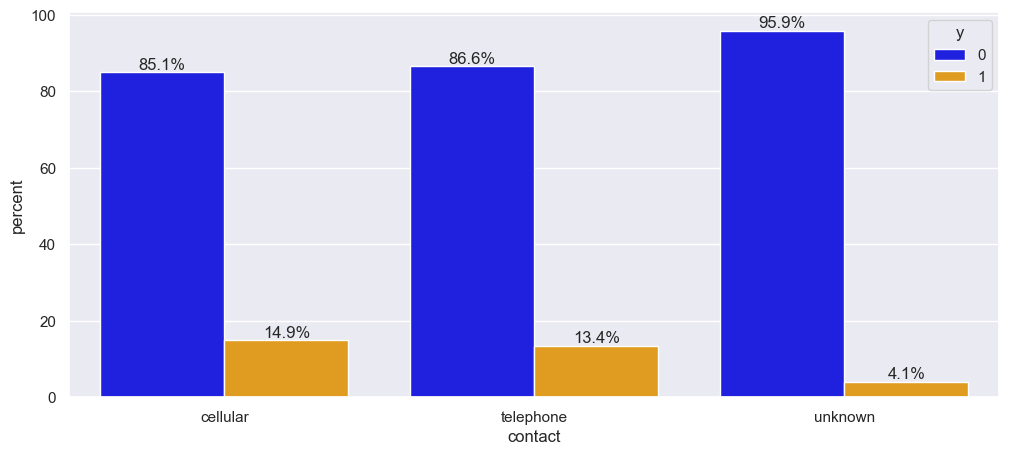

In [31]:
plt.figure(figsize=(12, 5))

# Calculate percentages
data_contact = (
    df.groupby("contact")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}

# Create the barplot with specified colors
ax = sns.barplot(x="contact", y="percent", hue="y", data=data_contact, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

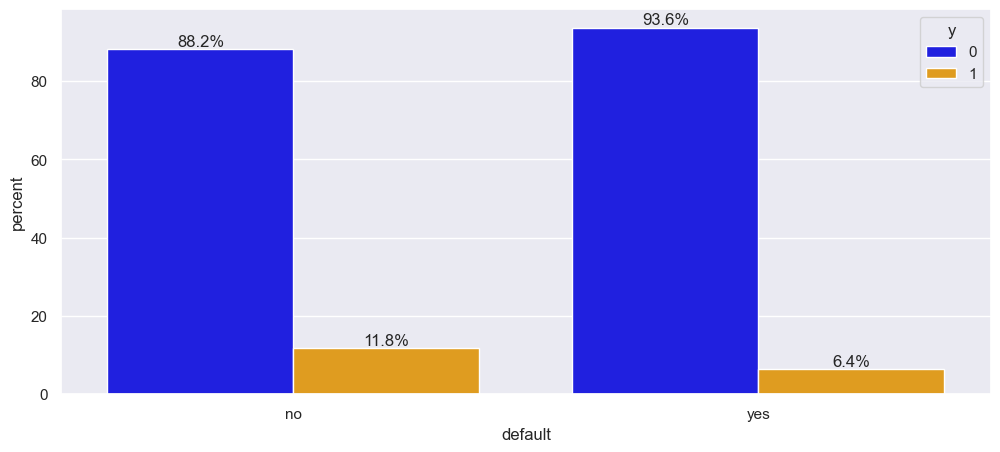

In [32]:
plt.figure(figsize=(12, 5))

# Calculate percentages
data_default = (
    df.groupby("default")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="default", y="percent", hue="y", data=data_default, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

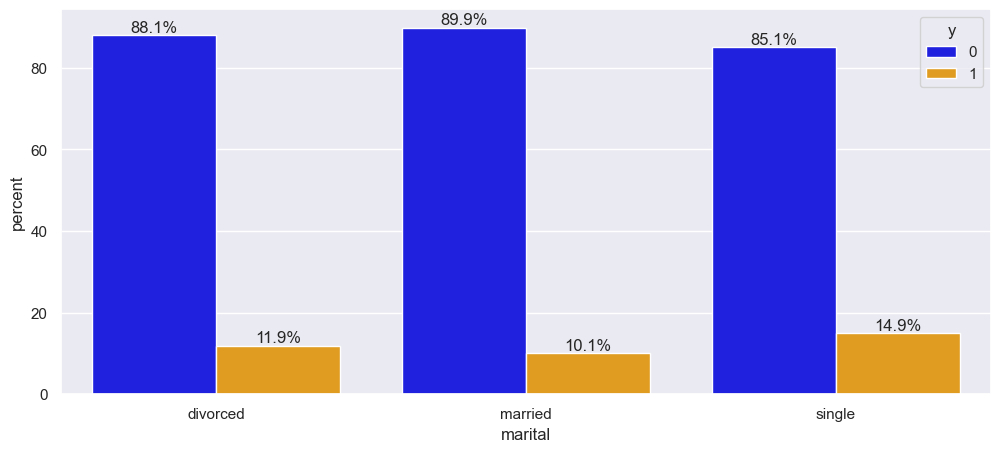

In [33]:
plt.figure(figsize=(12, 5))

# Calculate percentages
data_marital = (
    df.groupby("marital")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="marital", y="percent", hue="y", data=data_marital, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

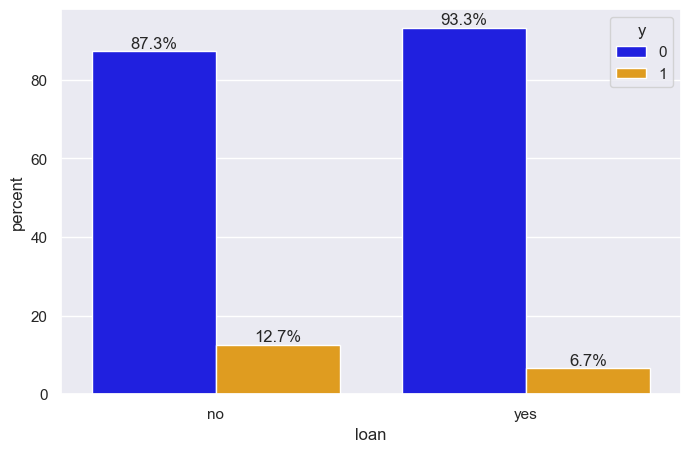

In [34]:
plt.figure(figsize=(8, 5))

# Calculate percentages
data_loan = (
    df.groupby("loan")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="loan", y="percent", hue="y", data=data_loan, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

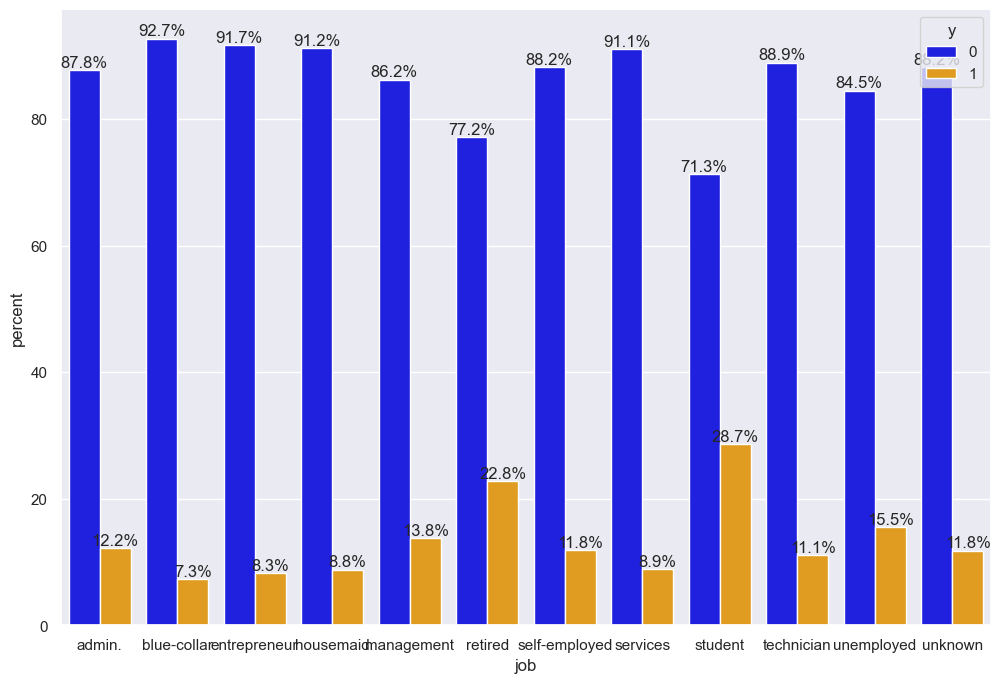

In [35]:
plt.figure(figsize=(12, 8))

# Calculate percentages
data_job = (
    df.groupby("job")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}

# Create the barplot with specified colors
ax = sns.barplot(x="job", y="percent", hue="y", data=data_job, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

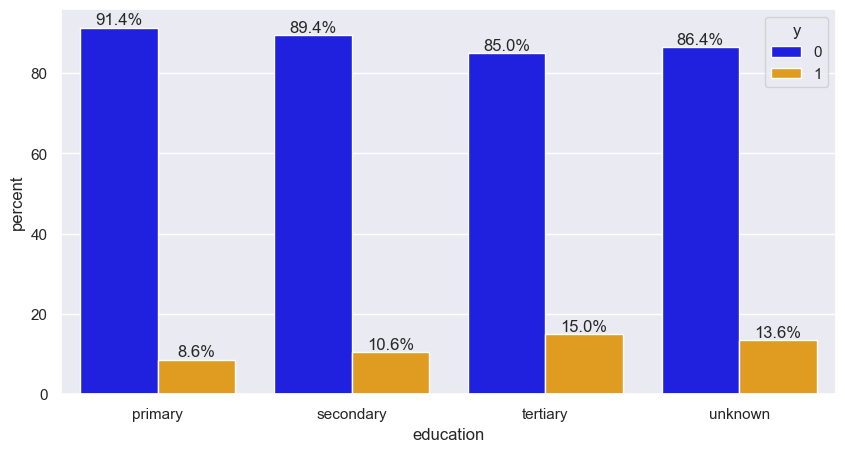

In [36]:
plt.figure(figsize=(10, 5))

# Calculate percentages
data_education = (
    df.groupby("education")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="education", y="percent", hue="y", data=data_education, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

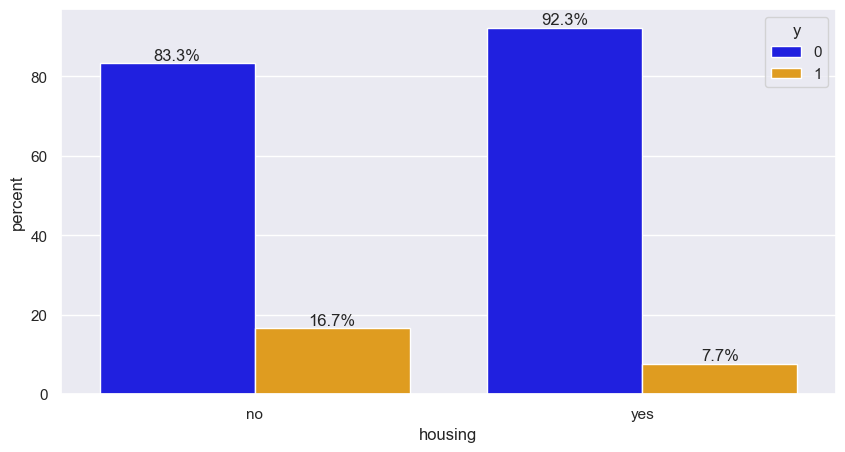

In [37]:
plt.figure(figsize=(10, 5))

# Calculate percentages
data_housing = (
    df.groupby("housing")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="housing", y="percent", hue="y", data=data_housing, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

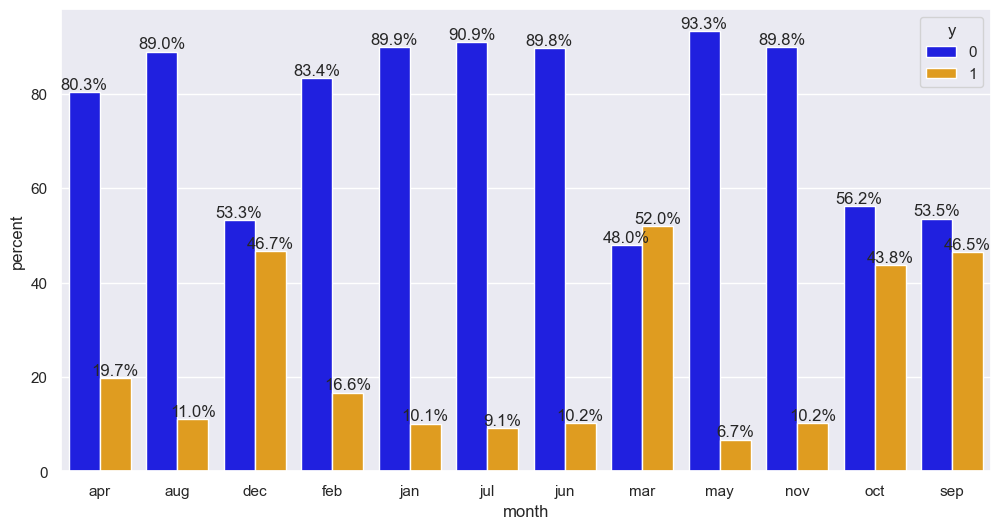

In [38]:
plt.figure(figsize=(12, 6))

# Calculate percentages
data_month = (
    df.groupby("month")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="month", y="percent", hue="y", data=data_month, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

In [39]:
continous_data.corr()

age  duration  campaign   balance     pdays  previous         y
age       1.000000 -0.004648  0.004760  0.097783 -0.023758  0.001288  0.025155
duration -0.004648  1.000000 -0.084570  0.021560 -0.001565  0.001203  0.394521
campaign  0.004760 -0.084570  1.000000 -0.014578 -0.088628 -0.032855 -0.073172
balance   0.097783  0.021560 -0.014578  1.000000  0.003435  0.016674  0.052838
pdays    -0.023758 -0.001565 -0.088628  0.003435  1.000000  0.454820  0.103621
previous  0.001288  0.001203 -0.032855  0.016674  0.454820  1.000000  0.093236
y         0.025155  0.394521 -0.073172  0.052838  0.103621  0.093236  1.000000

#### Insights from corr_matrix:


1. Age and the target variable 'y' have a weak positive correlation (0.025), suggesting a slight tendency for older individuals to subscribe for the term deposit.
2. The duration of the last contact has a moderate positive correlation (0.395) with the target variable 'y', indicating that longer durations of contact are associated with a higher likelihood of subscription.
3. The number of contacts performed during this campaign ('campaign') has a weak negative correlation (-0.073) with the target variable 'y', implying that too many contacts may lead to a decrease in subscription likelihood.
4. Balance has a very weak positive correlation (0.053) with the target variable 'y', indicating a slight positive association between higher balances and subscription.
5. Previous days since last contact ('pdays') and the number of contacts performed in previous campaigns ('previous') both have weak positive correlations with the target variable 'y', suggesting a slight tendency for individuals with more recent or frequent contacts to subscribe.
6. Other correlations among the variables are generally weak (close to 0), indicating a lack of significant linear relationships among them.

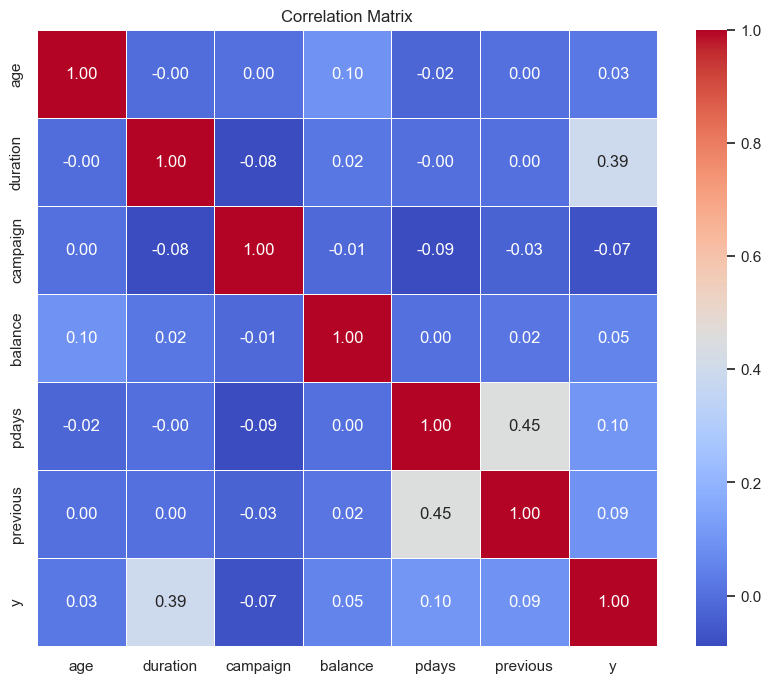

In [40]:
mult = df[['age', 'duration', 'campaign', 'balance', 'pdays', 'previous', 'y']]
correlation_matrix = mult.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#### Multivariate Analysis:

In [41]:
# sns.pairplot(mult,diag_kind='kde', hue = 'y')
# plt.show()

#### Data Prerocessing :

In [42]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### categorical_features:

In [43]:
categorical_col = []
for column in df.columns:
    if df[column].dtypes == object and len(df[column].unique())  <= 50:
        categorical_col.append(column)
        print(f"{column}:{df[column].unique()}")
        print("***************************")

job:['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
***************************
marital:['married' 'single' 'divorced']
***************************
education:['tertiary' 'secondary' 'unknown' 'primary']
***************************
default:['no' 'yes']
***************************
housing:['yes' 'no']
***************************
loan:['no' 'yes']
***************************
contact:['unknown' 'cellular' 'telephone']
***************************
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
***************************
poutcome:['unknown' 'failure' 'other' 'success']
***************************


#### Replacement of unknown values with mode of the columns:

In [44]:
for feature in categorical_column.columns:
    mode_value = df[feature].mode()[0]
    df[feature].replace('unknown',mode_value, inplace = True)

##### Encoding of categorical columns:

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
LE = LabelEncoder()

In [47]:
df.education = LE.fit_transform(df.education)

In [48]:
nominal_feat = ['job', 'marital', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome']

In [49]:
df = pd.get_dummies(df, columns=nominal_feat, drop_first = True)

In [50]:
df.head()

age  education  balance  day  duration  campaign  pdays  previous  y  \
0   58          2     2143    5       261         1     -1         0  0   
1   44          1       29    5       151         1     -1         0  0   
2   33          1        2    5        76         1     -1         0  0   
3   47          1     1506    5        92         1     -1         0  0   
4   33          1        1    5       198         1     -1         0  0   

   job_blue-collar  ...  month_jul  month_jun  month_mar  month_may  \
0                0  ...          0          0          0          1   
1                0  ...          0          0          0          1   
2                0  ...          0          0          0          1   
3                1  ...          0          0          0          1   
4                1  ...          0          0          0          1   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0          0          0          0               0                 0   
1          0          0          0               0                 0   
2          0          0          0               0                 0   
3          0          0          0               0                 0   
4          0          0          0               0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 39 columns]

#### Handling Outliers:

In [51]:
boxplot_info = {}

for column in df.columns[:-1]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR
    boxplot_info[column] = {
        "Min_limit": min_limit,
        "Max_limit":max_limit,
        "IQR":IQR
    }
print()
for column, info in boxplot_info.items():
    print(f"Min_limit, Max_limit and IQR of : {column}")
    print(f"Column : {column}")
    print(f"Min_limit :{info['Min_limit']}")
    print(f"Max_limit : {info['Max_limit']}")
    print(f"IQR : {info['IQR']}")
    print("------------")


Min_limit, Max_limit and IQR of : age
Column : age
Min_limit :10.5
Max_limit : 70.5
IQR : 15.0
------------
Min_limit, Max_limit and IQR of : education
Column : education
Min_limit :-0.5
Max_limit : 3.5
IQR : 1.0
------------
Min_limit, Max_limit and IQR of : balance
Column : balance
Min_limit :-1962.0
Max_limit : 3462.0
IQR : 1356.0
------------
Min_limit, Max_limit and IQR of : day
Column : day
Min_limit :-11.5
Max_limit : 40.5
IQR : 13.0
------------
Min_limit, Max_limit and IQR of : duration
Column : duration
Min_limit :-221.0
Max_limit : 643.0
IQR : 216.0
------------
Min_limit, Max_limit and IQR of : campaign
Column : campaign
Min_limit :-2.0
Max_limit : 6.0
IQR : 2.0
------------
Min_limit, Max_limit and IQR of : pdays
Column : pdays
Min_limit :-1.0
Max_limit : -1.0
IQR : 0.0
------------
Min_limit, Max_limit and IQR of : previous
Column : previous
Min_limit :0.0
Max_limit : 0.0
IQR : 0.0
------------
Min_limit, Max_limit and IQR of : y
Column : y
Min_limit :0.0
Max_limit : 0.0

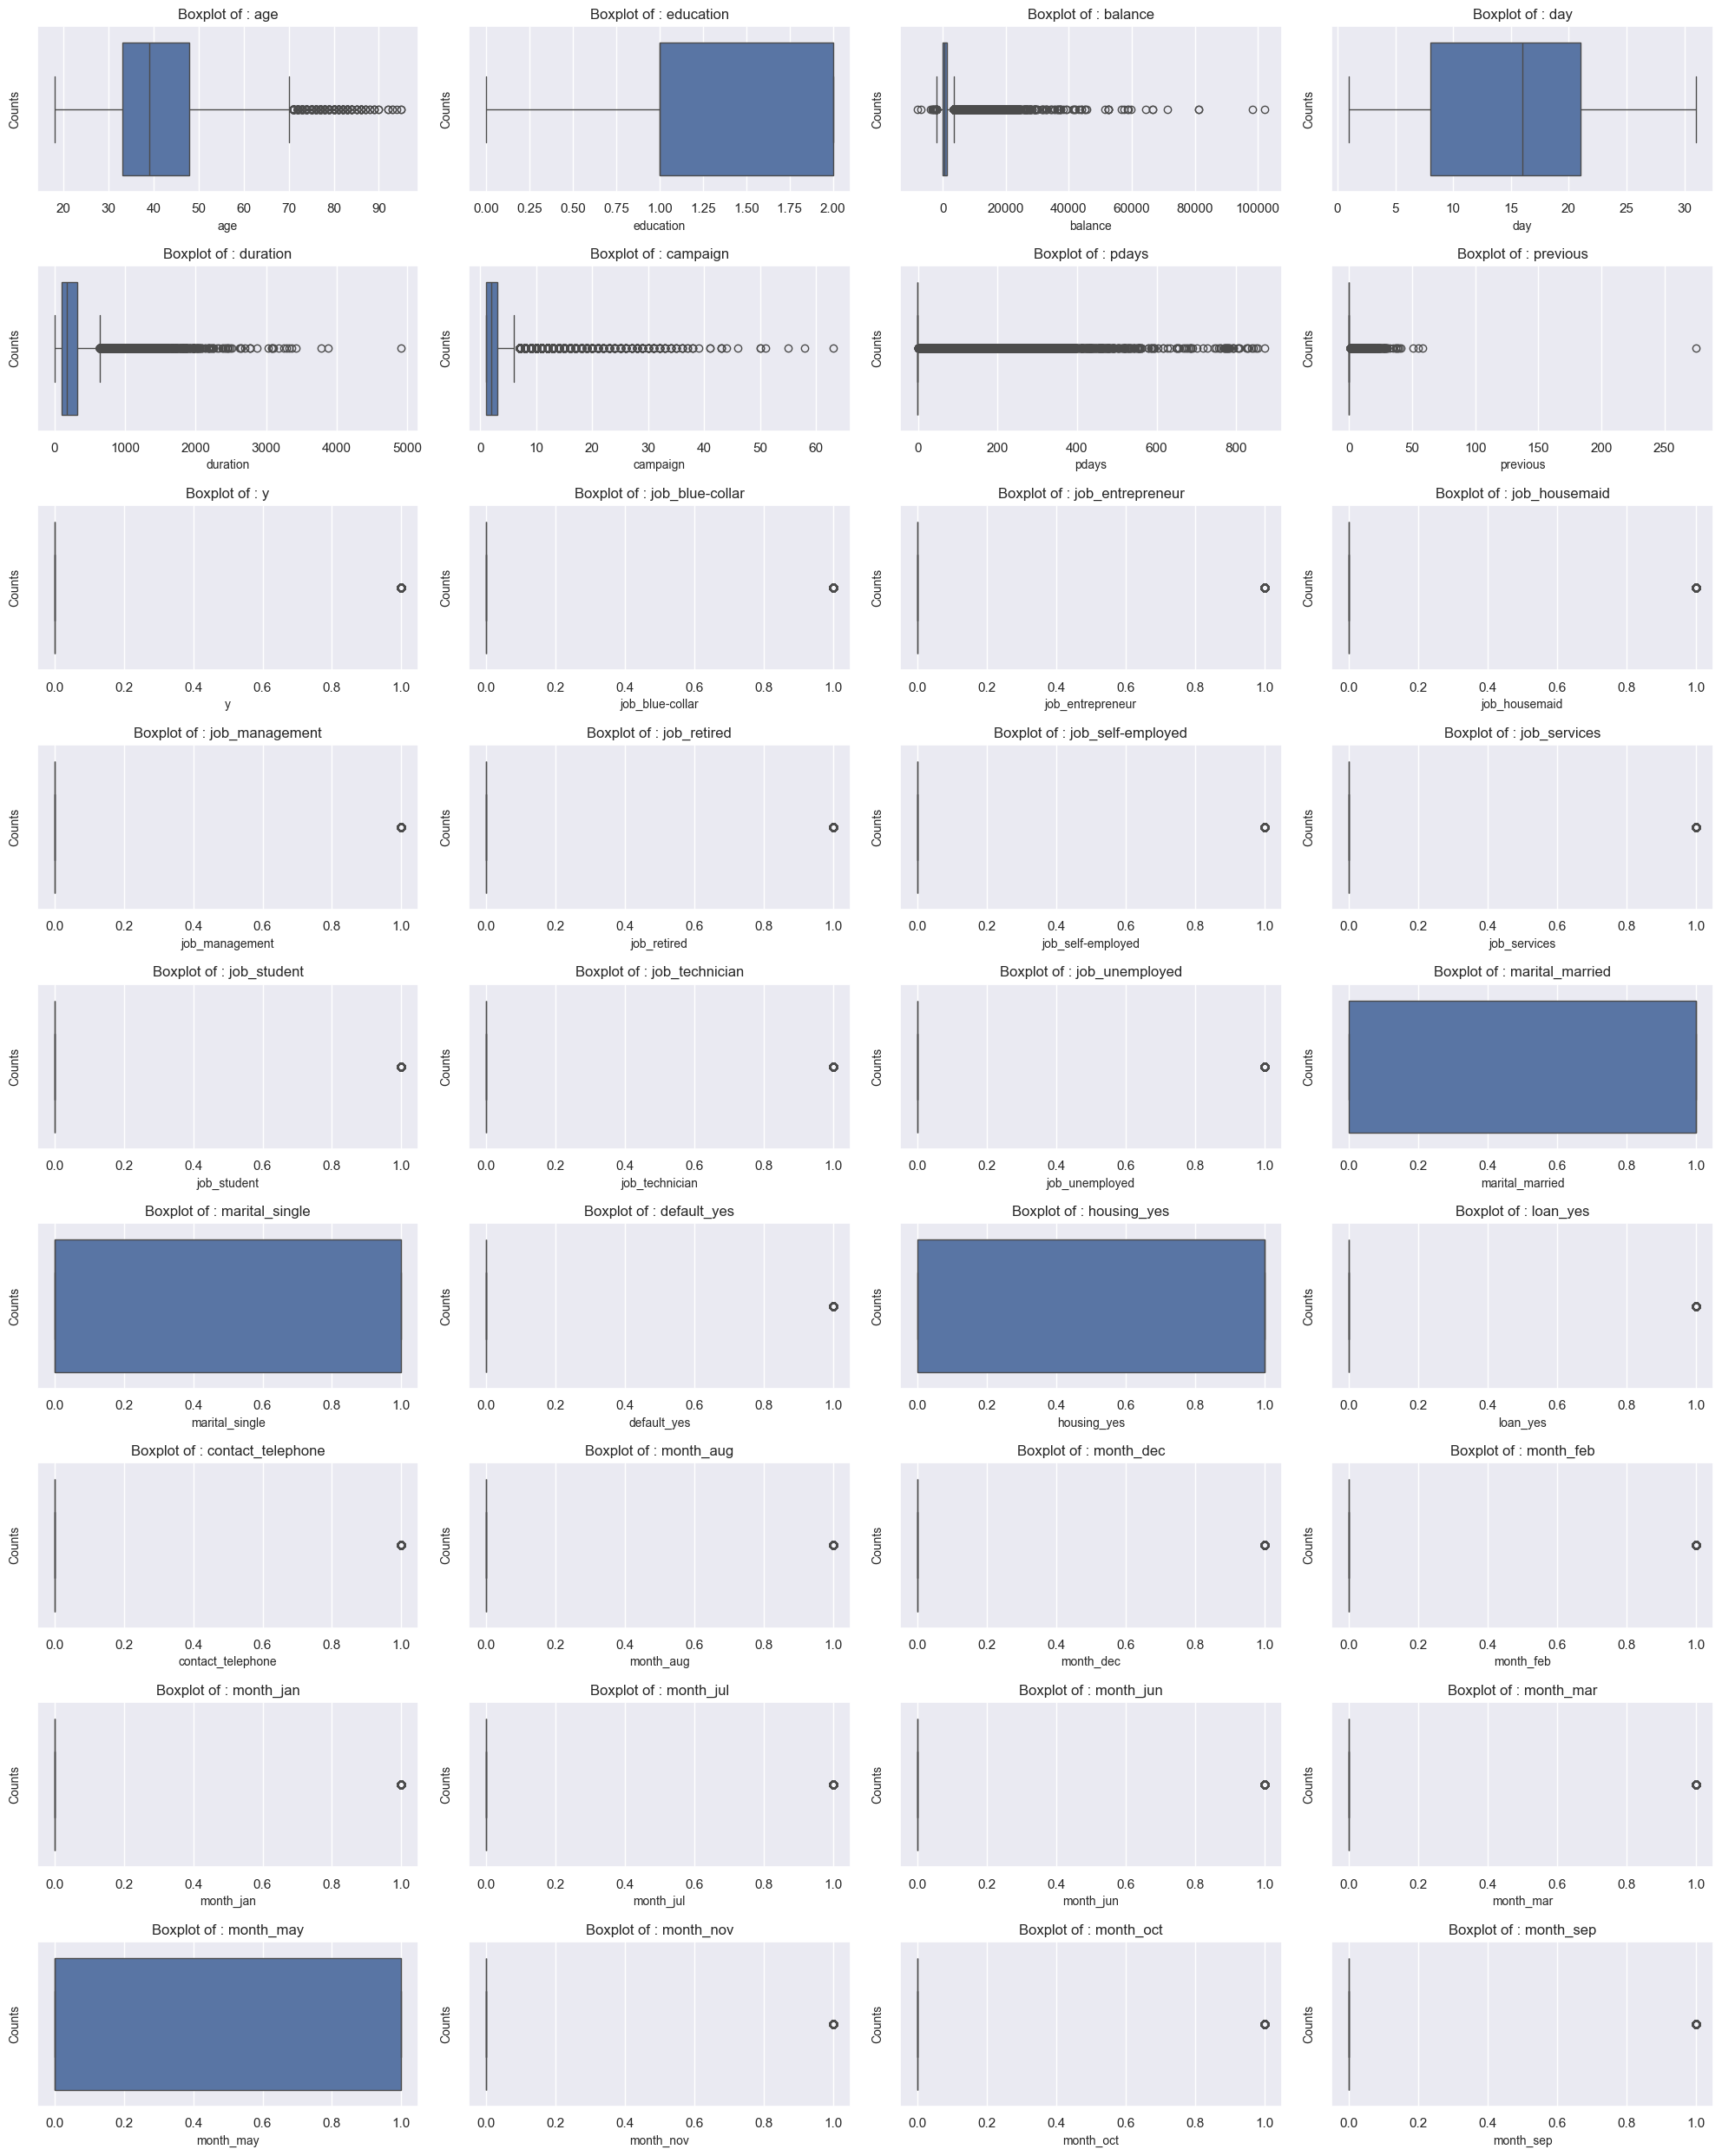

In [52]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in df.columns[:-1]:
    if plotnumber <= 36:
        plt.subplot(9,4,plotnumber)
        sns.boxplot(x = df[column])
        plt.title(f"Boxplot of : {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Counts', fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [53]:
def identify_outlier(column):
    q1= df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    outliers = df[(df[column] < min_limit) | (df[column] > max_limit)]
    return outliers

In [54]:
for column in df.columns[:-1]:
    outliers = identify_outlier(column)
    outliers_counts = len(outliers)
    if outliers_counts >= 0:
        print(f"feature {column} has {outliers_counts}  outliers")
        print("--------------")

feature age has 487  outliers
--------------
feature education has 0  outliers
--------------
feature balance has 4729  outliers
--------------
feature day has 0  outliers
--------------
feature duration has 3235  outliers
--------------
feature campaign has 3064  outliers
--------------
feature pdays has 8257  outliers
--------------
feature previous has 8257  outliers
--------------
feature y has 5289  outliers
--------------
feature job_blue-collar has 10020  outliers
--------------
feature job_entrepreneur has 1487  outliers
--------------
feature job_housemaid has 1240  outliers
--------------
feature job_management has 9458  outliers
--------------
feature job_retired has 2264  outliers
--------------
feature job_self-employed has 1579  outliers
--------------
feature job_services has 4154  outliers
--------------
feature job_student has 938  outliers
--------------
feature job_technician has 7597  outliers
--------------
feature job_unemployed has 1303  outliers
--------------
f

In [55]:
continous_data.head()

age  duration  campaign  balance  pdays  previous  y
0   58       261         1     2143     -1         0  0
1   44       151         1       29     -1         0  0
2   33        76         1        2     -1         0  0
3   47        92         1     1506     -1         0  0
4   33       198         1        1     -1         0  0

#### Handling outlier in continous_data:

In [56]:
continous_feat  = df[['age','balance','duration']]

In [57]:
for column in continous_feat.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    df[column] = np.where((df[column]< min_limit) | (df[column] > max_limit),
                         df[column].median(),df[column])

#### Handling outlier in discrete data:

In [58]:
discrete_feat = df[['campaign','pdays','previous']]

In [59]:
for column in discrete_feat.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    df[column] = np.where((df[column]<min_limit) | (df[column]>max_limit),
                         df[column].mode()[0], df[column])

#### Scaling of Features :

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scale = StandardScaler()

In [62]:
df[['age', 'duration', 'campaign', 'balance']] = scale.fit_transform(df[['age', 'duration', 'campaign', 'balance']])

#### Feature Selection:

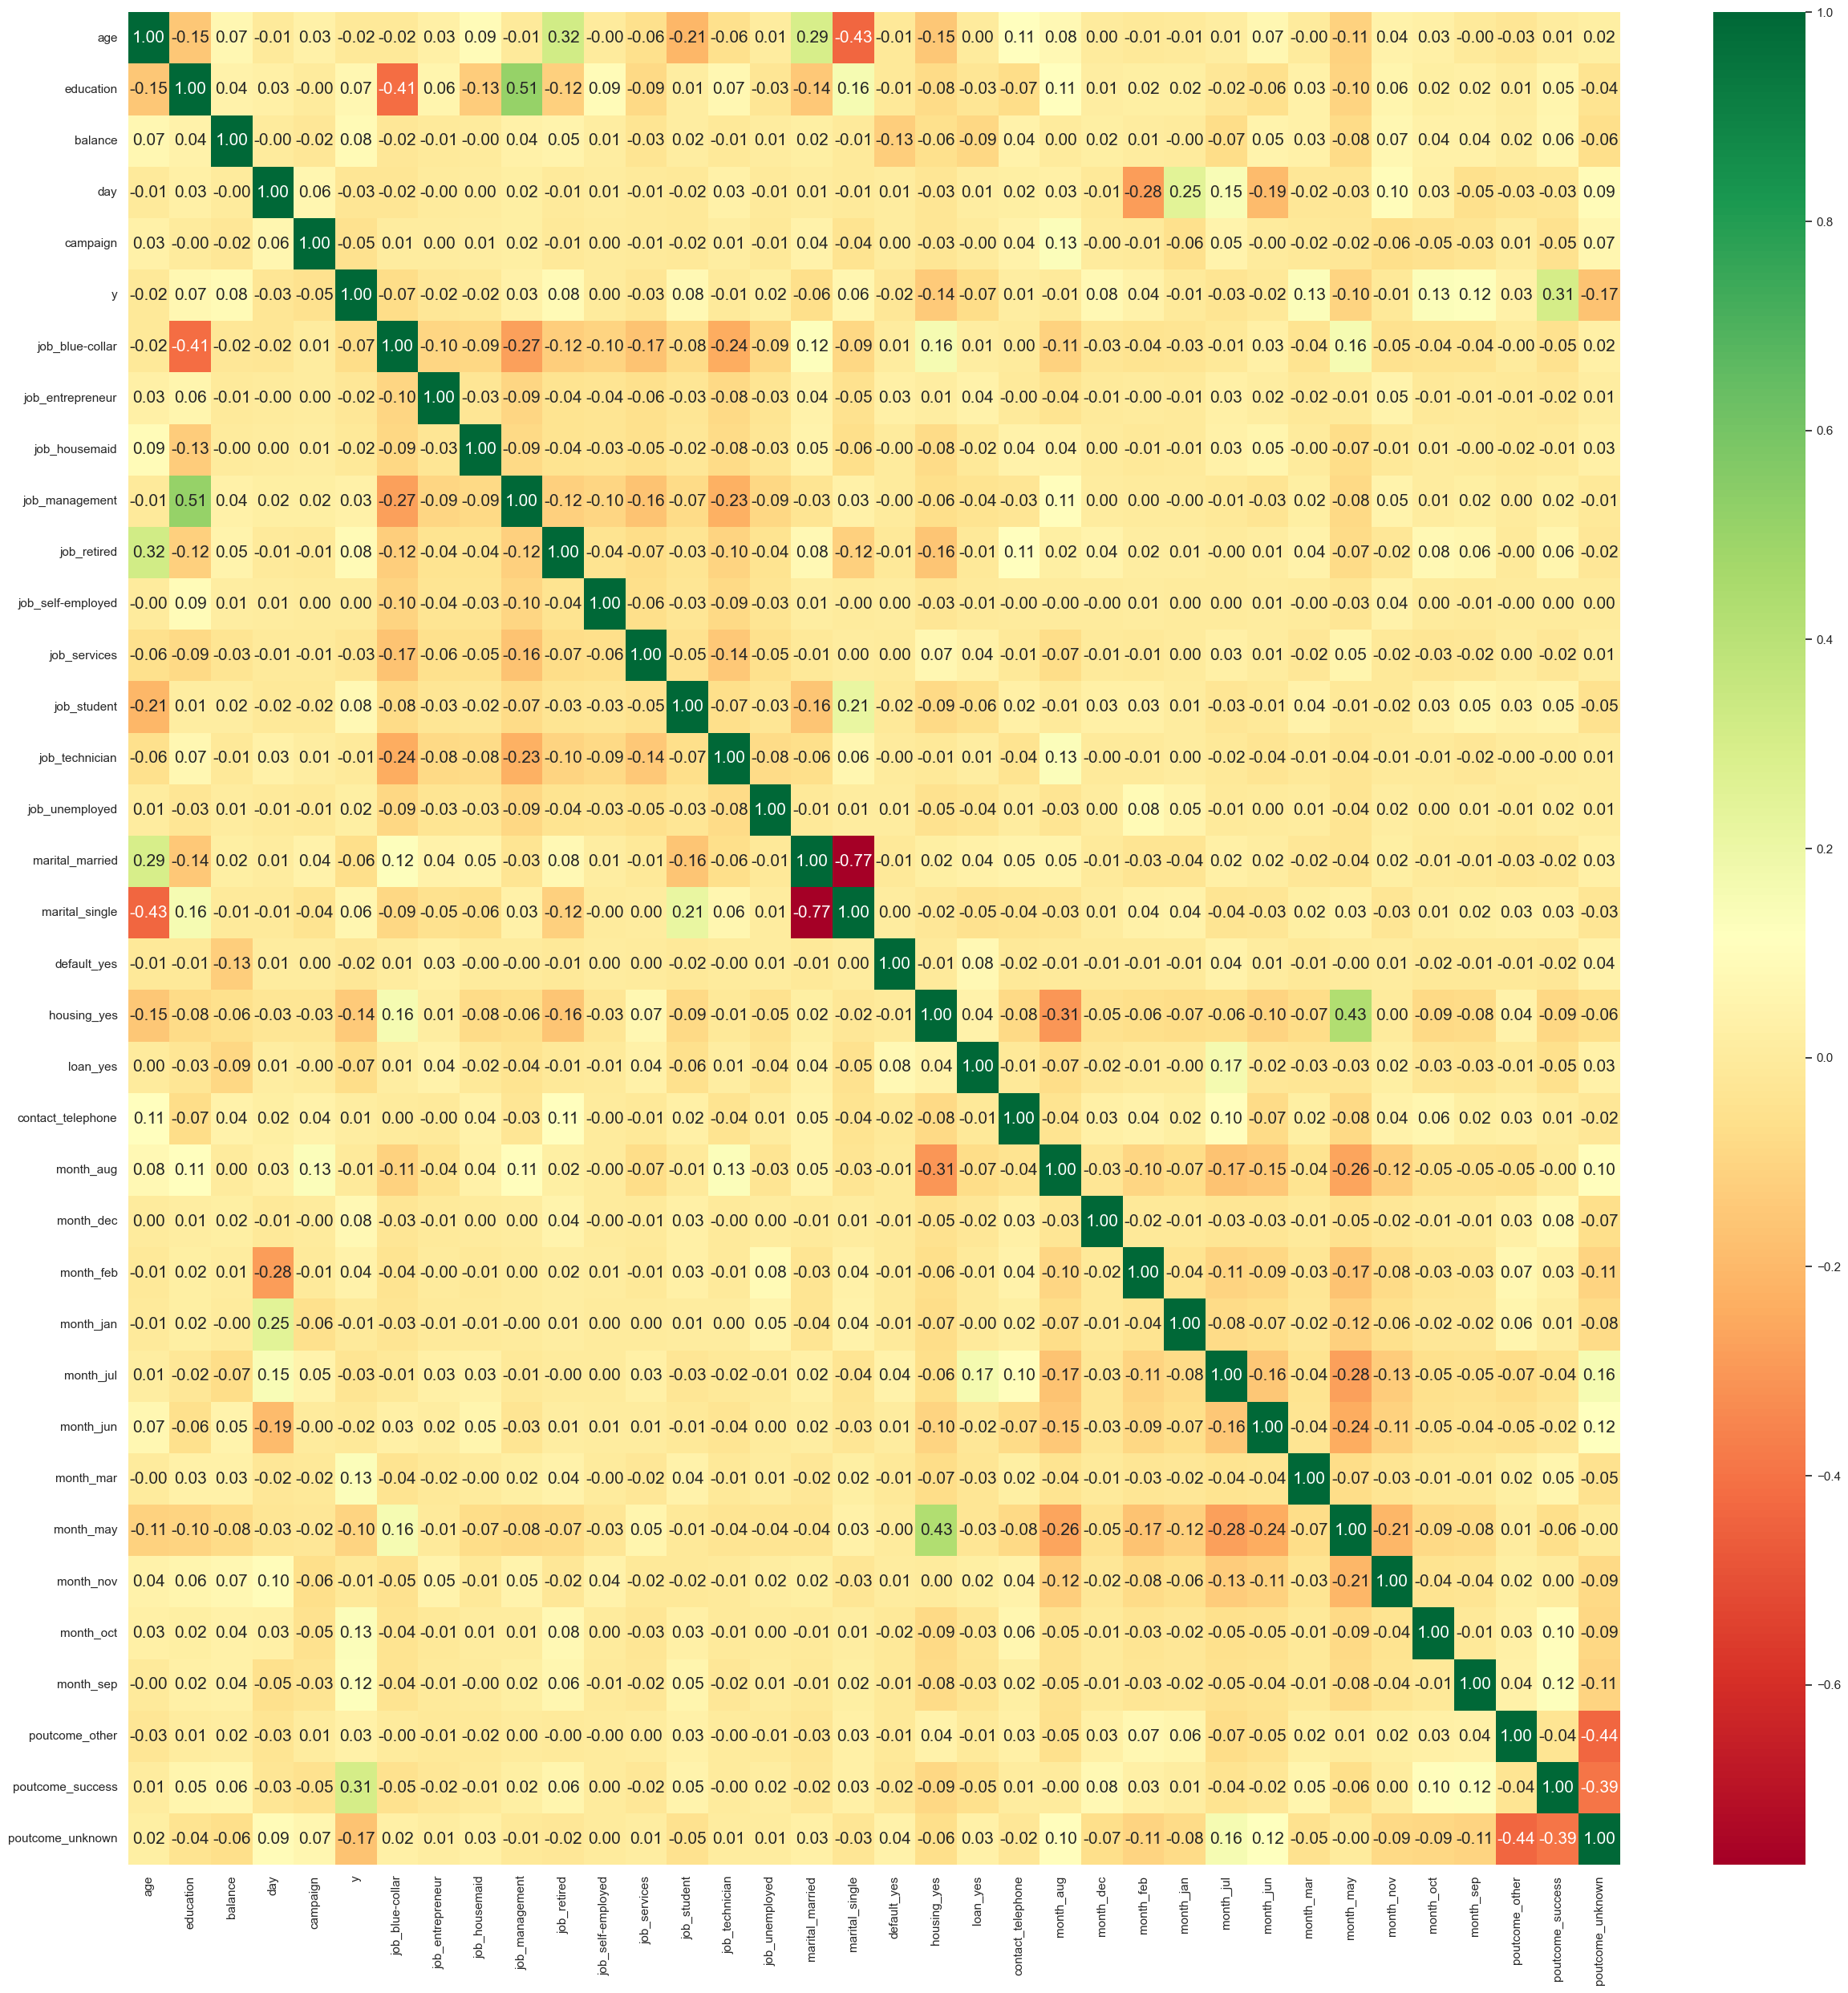

In [63]:
plt.figure(figsize=(30, 30))
l = ['previous', 'pdays', 'duration']
target_corr = df.drop(l, axis=1).corr()
sns.heatmap(target_corr, cmap='RdYlGn', annot=True, fmt='.2f', annot_kws={'size': 15})
plt.show()

In [64]:
df.std()

age                  1.000011
education            0.652218
balance              1.000011
day                  8.322476
duration             1.000011
campaign             1.000011
pdays                0.000000
previous             0.000000
y                    0.321406
job_blue-collar      0.415346
job_entrepreneur     0.178351
job_housemaid        0.163326
job_management       0.406740
job_retired          0.218105
job_self-employed    0.183592
job_services         0.288860
job_student          0.142538
job_technician       0.373901
job_unemployed       0.167303
marital_married      0.489505
marital_single       0.450411
default_yes          0.133049
housing_yes          0.496878
loan_yes             0.366820
contact_telephone    0.245247
month_aug            0.345087
month_dec            0.068637
month_feb            0.234862
month_jan            0.173407
month_jul            0.359516
month_jun            0.322771
month_mar            0.102174
month_may            0.460193
month_nov 

In [65]:
y = df.y

In [66]:
l2 = ['duration','pdays','previous','y']
x = df.drop(l2,axis = 1)


In [67]:
x.head()

age  education   balance  day  campaign  job_blue-collar  \
0  1.760223          2  1.900256    5 -0.809156                0   
1  0.349717          1 -0.738238    5 -0.809156                0   
2 -0.758537          1 -0.771936    5 -0.809156                0   
3  0.651969          1  1.105214    5 -0.809156                1   
4 -0.758537          1 -0.773185    5 -0.809156                1   

   job_entrepreneur  job_housemaid  job_management  job_retired  ...  \
0                 0              0               1            0  ...   
1                 0              0               0            0  ...   
2                 1              0               0            0  ...   
3                 0              0               0            0  ...   
4                 0              0               0            0  ...   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   
4          0          0          0          1          0          0   

   month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0          0               0                 0                 1  
1          0               0                 0                 1  
2          0               0                 0                 1  
3          0               0                 0                 1  
4          0               0                 0                 1  

[5 rows x 35 columns]

# Model Building :

In [94]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score, recall_score,precision_score, classification_report, confusion_matrix

In [69]:
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(x,y)

In [70]:
x_train,x_test, y_train,y_test = train_test_split(x_sm,y_sm, test_size= 0.25, random_state=42)

In [71]:
x_train.shape, x_test.shape

((59883, 35), (19961, 35))

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier()

In [74]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [75]:
y_rf = rf.predict(x_test)

In [76]:
rf_f1 = f1_score(y_test, y_rf)
rf_acc = accuracy_score(y_test, y_rf)
rf_recall = recall_score(y_test, y_rf)
rf_pre = precision_score(y_test, y_rf)

In [77]:
print("RandomForestClassifier f1_score : {}".format(rf_f1))
print("....................................")
print("RandomForestClassifier rf_acc : {}".format(rf_acc))
print("....................................")
print("RandomForestClassifier recall_score : {}".format(rf_recall))
print("....................................")
print("RandomForestClassifier precision_score : {}".format(rf_pre))
print("....................................")
print()

RandomForestClassifier f1_score : 0.9115119843223959
....................................
RandomForestClassifier rf_acc : 0.9117779670357197
....................................
RandomForestClassifier recall_score : 0.9059129045145825
....................................
RandomForestClassifier precision_score : 0.9171807058347659
....................................



In [78]:
cr = classification_report(y_test, y_rf)
print("classification_report of Tuned_RandomForestClassifier:\n  {}".format(cr))

classification_report of Tuned_RandomForestClassifier:
                precision    recall  f1-score   support

           0       0.91      0.92      0.91      9949
           1       0.92      0.91      0.91     10012

    accuracy                           0.91     19961
   macro avg       0.91      0.91      0.91     19961
weighted avg       0.91      0.91      0.91     19961



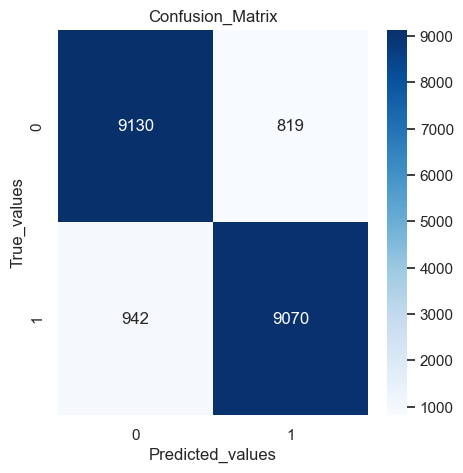

In [79]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, y_rf),annot  = True,fmt = 'd',cmap='Blues' )
plt.title("Confusion_Matrix")
plt.xlabel("Predicted_values")
plt.ylabel("True_values")
plt.show()

#### HyperParameter Tuning:

In [80]:
param_ = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


clf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(estimator=clf,param_distributions=param_,cv = 5, scoring='f1', verbose=2, refit=True )

In [92]:
# rf_cv.fit(x_train, y_train)

In [82]:
rf_cv.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': None,
 'bootstrap': False}

In [84]:
rf_cv.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=300)

In [86]:
rf_clf = RandomForestClassifier(n_estimators = 300,
min_samples_split = 5,
min_samples_leaf = 1,
max_depth = None,
bootstrap= False)

In [87]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=300)

In [88]:
y_rf_clf = rf_clf.predict(x_test)

In [89]:
tune_rf_f1 = f1_score(y_test, y_rf_clf)
tune_rf_acc = accuracy_score(y_test, y_rf_clf)
tune_rf_recall = recall_score(y_test, y_rf_clf)
tune_rf_pre = precision_score(y_test, y_rf_clf)

In [90]:
print("RandomForestClassifier Tuned_f1_score : {}".format(tune_rf_f1))
print("....................................")
print("RandomForestClassifier Tuned_rf_acc : {}".format(tune_rf_acc))
print("....................................")
print("RandomForestClassifier Tuned_recall_score : {}".format(tune_rf_recall))
print("....................................")
print("RandomForestClassifier Tuned_precision_score : {}".format(tune_rf_pre))
print("....................................")
print()

RandomForestClassifier Tuned_f1_score : 0.9115887660955084
....................................
RandomForestClassifier Tuned_rf_acc : 0.9126296277741596
....................................
RandomForestClassifier Tuned_recall_score : 0.8980223731522173
....................................
RandomForestClassifier Tuned_precision_score : 0.9255713403335393
....................................



In [91]:
cr = classification_report(y_test, y_rf_clf)
print("classification_report of Tuned_RandomForestClassifier:\n  {}".format(cr))

classification_report of Tuned_RandomForestClassifier:
                precision    recall  f1-score   support

           0       0.90      0.93      0.91      9949
           1       0.93      0.90      0.91     10012

    accuracy                           0.91     19961
   macro avg       0.91      0.91      0.91     19961
weighted avg       0.91      0.91      0.91     19961



# Voting Classifier:

In [96]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [97]:
clf1 = DecisionTreeClassifier()
clf2 = SVC(probability=True)
clf3  = KNeighborsClassifier()

In [98]:
voting_clf = VotingClassifier(estimators=[('dt', clf1),('svm',clf2),('knn', clf3)], voting = 'hard')

In [99]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('svm', SVC(probability=True)),
                             ('knn', KNeighborsClassifier())])

In [100]:
y_vc = voting_clf.predict(x_test)

In [103]:
vc_f1 = f1_score(y_test, y_vc)
vc_acc = accuracy_score(y_test, y_vc)
vc_recall = recall_score(y_test, y_vc)
vc_pre = precision_score(y_test, y_vc)

In [105]:
scores = {
    "Voting Classifier f1_score": f1_score(y_test, y_vc),
    "Voting Classifier accuracy_score": accuracy_score(y_test, y_vc),
    "Voting Classifier recall_score": recall_score(y_test, y_vc),
    "Voting Classifier precision_score": precision_score(y_test, y_vc)
}

for key, value in scores.items():
    print(key + ":", value)
    print("****************")

Voting Classifier f1_score: 0.8823672319129294
****************
Voting Classifier accuracy_score: 0.8787134913080507
****************
Voting Classifier recall_score: 0.9069117059528565
****************
Voting Classifier precision_score: 0.859116283470527
****************


### XGBClassifier:

In [89]:
from xgboost import XGBClassifier

In [90]:
xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
y_xg = xg.predict(x_test)

In [92]:
f1_score(y_test, y_xg)

0.9242089014664265

#### HyperParameter Tuning XGBClassifier:

In [93]:
param_grid = {
    'gamma': [0.1, 1, 10, 100],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [5, 7, 10, 12],
    'n_estimators': [50, 100, 150],
    'reg_alpha': [0.1, 1, 10, 100],
    'reg_lambda': [0.1, 1, 10, 100]
}

XGB = XGBClassifier(random_state = 42, verbosity = 0, silent = 0)
xg_clf = RandomizedSearchCV(estimator=XGB,param_distributions=param_grid,verbose=2,scoring='f1' ,cv=5,random_state=42)

In [94]:
# xg_clf.fit(x_train, y_train)

In [95]:
from xgboost import plot_importance

In [97]:
# plot_importance(xg_clf.best_estimator_)

In [98]:
# xg_clf.best_params_

In [99]:
xgb_clf = XGBClassifier(reg_lambda = 10,
 reg_alpha = 0.1,
 n_estimators= 150,
 max_depth = 7,
 learning_rate = 0.2,
 gamma = 0.1)

In [100]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
y_xgb_clf = xgb_clf.predict(x_test)

In [102]:
tune_xgb_f1 = f1_score(y_test, y_xgb_clf)
tune_xgb_acc = accuracy_score(y_test, y_xgb_clf)
tune_xgb_recall = recall_score(y_test, y_xgb_clf)
tune_xgb_precision = precision_score(y_test, y_xgb_clf)

In [103]:
print("Tuned_XGBC_f1_score:  {}".format(tune_xgb_f1))
print("........................")
print("Tuned_XGBC_accuracy_score : {}".format(tune_xgb_acc))
print(".............................")
print("Tuned_XGBC_recall_score:  {}".format(tune_xgb_recall))
print("............................")
print("Tuned_XGBC_precision_score : {}".format(tune_xgb_precision))

Tuned_XGBC_f1_score:  0.926019487549621
........................
Tuned_XGBC_accuracy_score : 0.9281098141375682
.............................
Tuned_XGBC_recall_score:  0.8970235717139433
............................
Tuned_XGBC_precision_score : 0.9569525839104954


In [104]:
cr = classification_report(y_test, y_xgb_clf)
print("Classification_report of XGBClassifier:\n  {}".format(cr))

Classification_report of XGBClassifier:
                precision    recall  f1-score   support

           0       0.90      0.96      0.93      9949
           1       0.96      0.90      0.93     10012

    accuracy                           0.93     19961
   macro avg       0.93      0.93      0.93     19961
weighted avg       0.93      0.93      0.93     19961



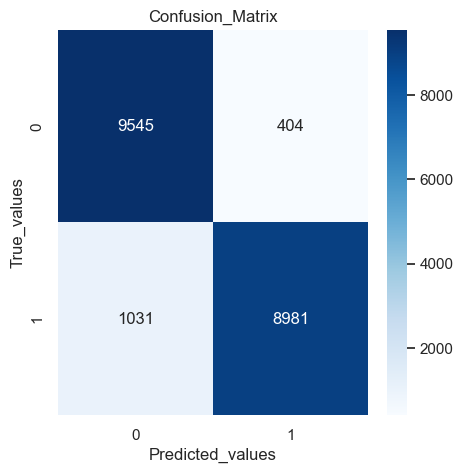

In [105]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, y_xgb_clf),annot  = True,fmt = 'd',cmap='Blues' )
plt.title("Confusion_Matrix")
plt.xlabel("Predicted_values")
plt.ylabel("True_values")
plt.show()

In [ ]:
Hyper parameter fir

### SVM:

In [106]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [107]:
y_sv = sv.predict(x_test)

In [108]:
f1_score(y_test, y_sv)

0.7915294117647059

#### Hyperparameter tuning:

In [109]:
param = {
    'C':[0.1, 5, 10, 50 ,60, 70],
    'gamma':[1,0.1,0.01, 0.001,0.0001],
    'random_state' : (list(range(1,20)))
}
sv_cv =RandomizedSearchCV(estimator=sv,param_distributions=param, scoring='f1', verbose=2, cv=5,n_iter = 100, refit=True)

In [110]:
# sv_cv.fit(x_train, y_train)

In [111]:
sv = SVC(C=70, gamma=0.001,random_state=42)
sv.fit(x_train, y_train)

SVC(C=70, gamma=0.001, random_state=42)

In [112]:
y_sv_tune = sv.predict(x_test)

In [113]:
sv_tune_f1 = f1_score(y_test, y_sv_tune)
sv_tune_acc = accuracy_score(y_test, y_sv_tune)
sv_tune_recall = recall_score(y_test, y_sv_tune)
sv_tune_pre = precision_score(y_test, y_sv_tune)

In [114]:
print("SVC tuned_f1_score : {}".format(sv_tune_f1))
print(".......................")
print("SVC tuned_accuracy_score : {}".format(sv_tune_acc))
print(".......................")
print("SVC tuned_recall_score : {}".format(sv_tune_recall))
print(".......................")
print("SVC tuned_precision_score : {}".format(sv_tune_pre))
print(".......................")

SVC tuned_f1_score : 0.7964955425760836
.......................
SVC tuned_accuracy_score : 0.8010119733480286
.......................
SVC tuned_recall_score : 0.7763683579704355
.......................
SVC tuned_precision_score : 0.8176940879444561
.......................


#### Model Comparison Report :

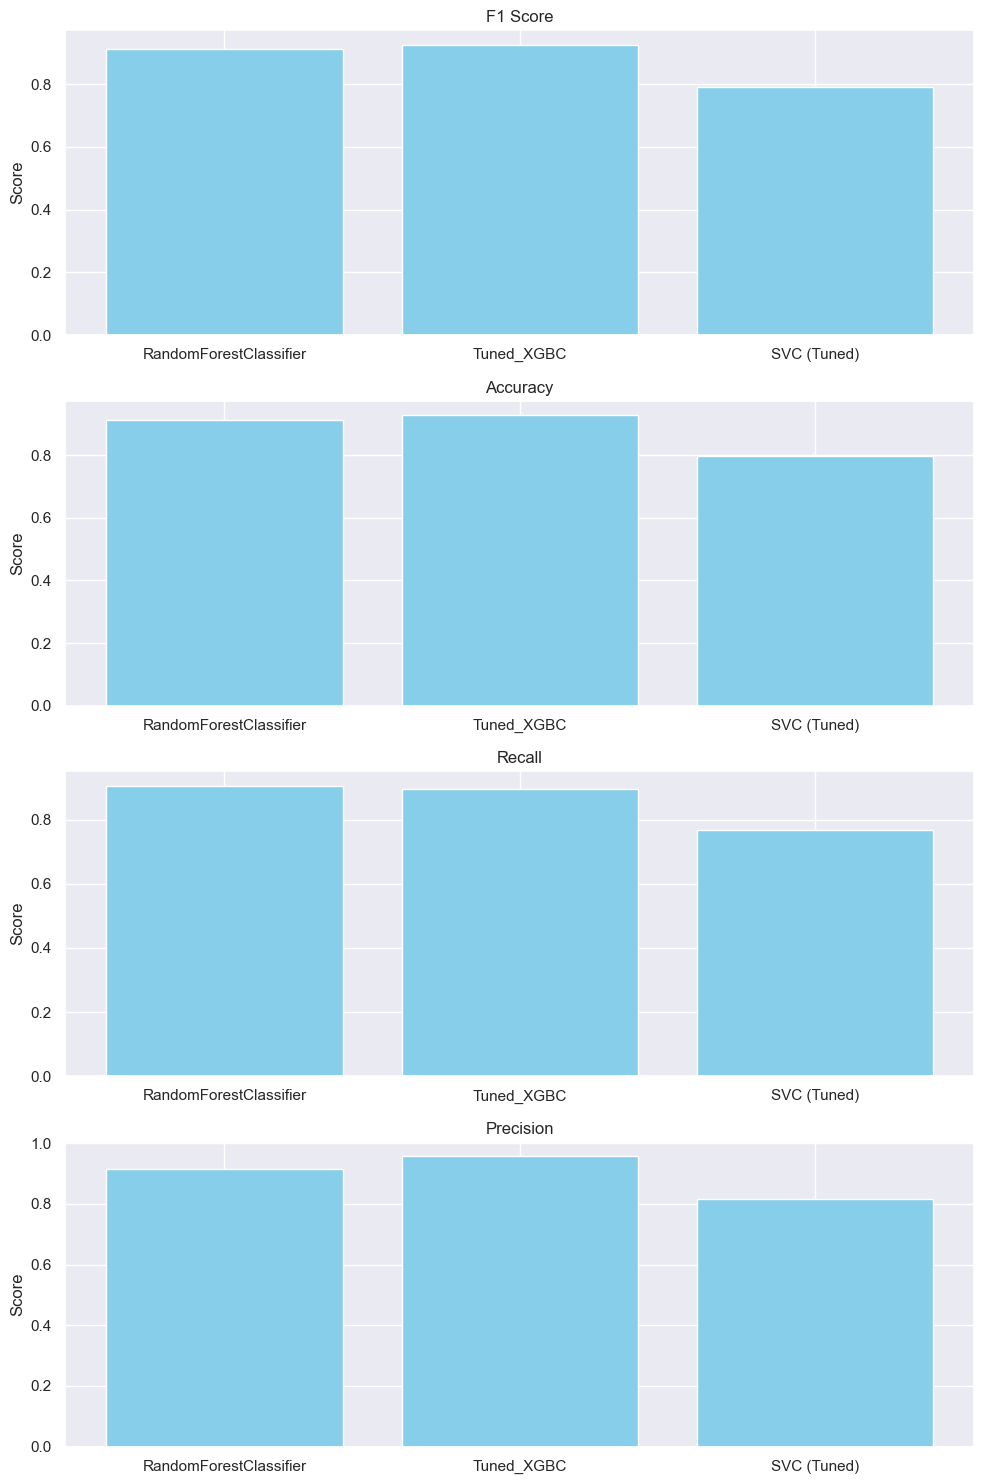

In [115]:
import matplotlib.pyplot as plt

# Data
models = ['RandomForestClassifier', 'Tuned_XGBC', 'SVC (Tuned)']
f1_scores = [0.9104784857157202, 0.9248155219567573, 0.7917031241957898]
accuracy_scores = [0.9106758178447973, 0.927007664946646, 0.7972546465607936]
recall_scores = [0.9056132640831003, 0.8950259688373952, 0.7681781861765881]
precision_scores = [0.9153962645128723, 0.9566563467492261, 0.8167144525857492]

# Plot
fig, axs = plt.subplots(4, figsize=(10, 15))

# F1 Score
axs[0].bar(models, f1_scores, color='skyblue')
axs[0].set_title('F1 Score')
axs[0].set_ylabel('Score')

# Accuracy
axs[1].bar(models, accuracy_scores, color='skyblue')
axs[1].set_title('Accuracy')
axs[1].set_ylabel('Score')

# Recall
axs[2].bar(models, recall_scores, color='skyblue')
axs[2].set_title('Recall')
axs[2].set_ylabel('Score')

# Precision
axs[3].bar(models, precision_scores, color='skyblue')
axs[3].set_title('Precision')
axs[3].set_ylabel('Score')

plt.tight_layout()
plt.show()
